Preprocessing Datasets

Loading Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading CSV File

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Zohaib_Project/Disease-Symptom-Prediction.csv'

df = pd.read_csv(path)

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Differentiating Between Disease and Symptoms

In [ ]:
disease_col = 'Disease'
symptom_cols = [c for c in df.columns if c != disease_col]
symptom_cols


['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

Combining Symptoms into one column

In [ ]:
def collect_symptoms(row):
    symptoms = []
    for col in symptom_cols:
        val = row[col]
        if val is not None and val != '' and val != 'nan':
            symptoms.append(val)
    # remove duplicates while keeping order
    seen = set()
    final = []
    for s in symptoms:
        if s not in seen:
            final.append(s)
            seen.add(s)
    return final

# Create Symptoms_List
df['Symptoms_List'] = df.apply(collect_symptoms, axis=1)

# Drop all original symptom columns
df = df.drop(columns=symptom_cols)

# Convert Symptoms_List into a single combined text column
df['Symptoms'] = df['Symptoms_List'].apply(lambda lst: ' '.join(str(s).replace(',', ' ') for s in lst))

# Clean spacing (removes multiple spaces caused by commas)
df['Symptoms'] = df['Symptoms'].apply(lambda x: ' '.join(x.split()))

# Keep only Disease and Symptoms
df = df[['Disease', 'Symptoms']]

df.head()


,Disease,Symptoms
0,Fungal infection,itching skin_rash nodal_skin_eruptions dischro...
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic _pat...
2,Fungal infection,itching nodal_skin_eruptions dischromic _patch...
3,Fungal infection,itching skin_rash dischromic _patches nan
4,Fungal infection,itching skin_rash nodal_skin_eruptions nan


checking shape

In [ ]:
df.shape

(4920, 2)

cleaning text

In [ ]:
def clean_text(value):
    if pd.isna(value):
        return None

    value = str(value).strip().lower()
    value = value.replace('_', ' ')

    # Remove literal 'nan' appearing in text
    value = value.replace('nan', ' ')

    # Remove extra spaces after cleanup
    value = ' '.join(value.split())

    # If text becomes empty after cleaning
    if value == '':
        return None

    return value

# Apply to both columns
for col in ['Disease', 'Symptoms']:
    df[col] = df[col].apply(clean_text)

df.head()


,Disease,Symptoms
0,fungal infection,itching skin rash nodal skin eruptions dischro...
1,fungal infection,skin rash nodal skin eruptions dischromic patches
2,fungal infection,itching nodal skin eruptions dischromic patches
3,fungal infection,itching skin rash dischromic patches
4,fungal infection,itching skin rash nodal skin eruptions


Droping null rows

In [ ]:
df = df.dropna(axis=1, how='all')
df.shape

(4920, 2)

Basic EDA

In [ ]:
df.iloc[3500:3510].head()

,Disease,Symptoms
3500,malaria,chills vomiting high fever sweating headache n...
3501,chicken pox,itching skin rash fatigue lethargy high fever ...
3502,dengue,skin rash chills joint pain vomiting fatigue h...
3503,typhoid,chills vomiting fatigue high fever headache na...
3504,hepatitis a,joint pain vomiting yellowish skin dark urine ...


In [ ]:
df.columns

Index(['Disease', 'Symptoms'], dtype='object')

In [ ]:
df.to_csv('preprocessed_dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download('preprocessed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

path = '/content/drive/MyDrive/Zohaib_Project/preprocessed_dataset.csv'

df = pd.read_csv(path)
df.head()

,Disease,Symptoms
0,fungal infection,itching skin rash nodal skin eruptions dischro...
1,fungal infection,skin rash nodal skin eruptions dischromic patches
2,fungal infection,itching nodal skin eruptions dischromic patches
3,fungal infection,itching skin rash dischromic patches
4,fungal infection,itching skin rash nodal skin eruptions


In [4]:
# Install required libraries first
!pip install gensim
!pip install fasttext
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498212 sha256=780ebc82f72e43f50865ddcabd776ed88b41f7e78c6da1769fb5fa701685d9fe
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import gensim
from gensim.models import Word2Vec, FastText
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [8]:
path = '/content/drive/MyDrive/Zohaib_Project/preprocessed_dataset.csv'
df = pd.read_csv(path)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

Dataset shape: (4920, 2)
Columns: ['Disease', 'Symptoms']
            Disease                                           Symptoms
0  fungal infection  itching skin rash nodal skin eruptions dischro...
1  fungal infection  skin rash nodal skin eruptions dischromic patches
2  fungal infection    itching nodal skin eruptions dischromic patches
3  fungal infection               itching skin rash dischromic patches
4  fungal infection             itching skin rash nodal skin eruptions

Missing values:
Disease     0
Symptoms    0
dtype: int64


In [9]:
# ==================== PREPARE DATA ====================
# Encode labels
label_encoder = LabelEncoder()
df['disease_encoded'] = label_encoder.fit_transform(df['Disease'])
num_classes = len(label_encoder.classes_)
print(f"\nNumber of classes: {num_classes}")
print(f"Class distribution:\n{df['Disease'].value_counts()}")

# Check if we have enough samples per class
min_samples = df['Disease'].value_counts().min()
print(f"\nMinimum samples per class: {min_samples}")

# Adjust split ratios for small dataset
if len(df) < 5000:
    test_size = 0.15  # 15% for test
    val_size = 0.15   # 15% for validation from remaining
    print(f"\nUsing adjusted split ratios for small dataset:")
    print(f"Train: ~70%, Val: ~15%, Test: ~15%")
else:
    test_size = 0.2
    val_size = 0.2

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    df['Symptoms'].values,
    df['disease_encoded'].values,
    test_size=test_size + val_size,
    random_state=42,
    stratify=df['disease_encoded'].values
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"\nDataset splits:")
print(f"Train size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Val size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")



Number of classes: 41
Class distribution:
Disease
fungal infection                          120
allergy                                   120
gerd                                      120
chronic cholestasis                       120
drug reaction                             120
peptic ulcer diseae                       120
aids                                      120
diabetes                                  120
gastroenteritis                           120
bronchial asthma                          120
hypertension                              120
migraine                                  120
cervical spondylosis                      120
paralysis (brain hemorrhage)              120
jaundice                                  120
malaria                                   120
chicken pox                               120
dengue                                    120
typhoid                                   120
hepatitis a                               120
hepatitis b                  

In [10]:
# ==================== TOKENIZE TEXT ====================
# Tokenize for embeddings
train_tokens = [str(text).lower().split() for text in X_train]
val_tokens = [str(text).lower().split() for text in X_val]
test_tokens = [str(text).lower().split() for text in X_test]

In [11]:
# ==================== TRAIN WORD2VEC (Optimized for small data) ====================
print("\n" + "="*50)
print("Training Word2Vec...")
print("="*50)
word2vec_model = Word2Vec(
    sentences=train_tokens,
    vector_size=100,
    window=5,
    min_count=1,  # Keep all words due to small dataset
    workers=4,
    epochs=20,  # More epochs for small dataset
    sg=1,  # Skip-gram works better for small datasets
    negative=5
)
print("Word2Vec training complete!")


Training Word2Vec...
Word2Vec training complete!


In [12]:
# ==================== TRAIN FASTTEXT (Optimized for small data) ====================
print("\n" + "="*50)
print("Training FastText...")
print("="*50)
fasttext_model = FastText(
    sentences=train_tokens,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    epochs=20,  # More epochs for small dataset
    sg=1,  # Skip-gram
    negative=5
)
print("FastText training complete!")


Training FastText...
FastText training complete!


In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-12-11 06:31:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-12-11 06:31:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-12-11 06:31:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [14]:
# Function to load GloVe embeddings
def load_glove_embeddings(glove_file='glove.6B.100d.txt'):
    embeddings = {}
    try:
        with open(glove_file, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
        print(f"Loaded {len(embeddings)} GloVe embeddings")
    except:
        print("GloVe file not found. Using Word2Vec as alternative for demonstration.")
        return None
    return embeddings

glove_embeddings = load_glove_embeddings()

Loaded 400000 GloVe embeddings


In [15]:
# ==================== EMBEDDING FUNCTIONS ====================
def get_sentence_embedding(tokens, model, model_type='word2vec'):
    """Convert tokens to sentence embedding by averaging word vectors"""
    embeddings = []

    if model_type == 'glove' and glove_embeddings:
        for token in tokens:
            if token in glove_embeddings:
                embeddings.append(glove_embeddings[token])
    else:
        for token in tokens:
            try:
                embeddings.append(model.wv[token])
            except:
                continue

    if len(embeddings) == 0:
        return np.zeros(100)

    return np.mean(embeddings, axis=0)


In [16]:
# ==================== CREATE EMBEDDINGS ====================
print("\nCreating embeddings for all datasets...")

# Word2Vec embeddings
X_train_w2v = np.array([get_sentence_embedding(tokens, word2vec_model, 'word2vec') for tokens in train_tokens])
X_val_w2v = np.array([get_sentence_embedding(tokens, word2vec_model, 'word2vec') for tokens in val_tokens])
X_test_w2v = np.array([get_sentence_embedding(tokens, word2vec_model, 'word2vec') for tokens in test_tokens])

# FastText embeddings
X_train_ft = np.array([get_sentence_embedding(tokens, fasttext_model, 'fasttext') for tokens in train_tokens])
X_val_ft = np.array([get_sentence_embedding(tokens, fasttext_model, 'fasttext') for tokens in val_tokens])
X_test_ft = np.array([get_sentence_embedding(tokens, fasttext_model, 'fasttext') for tokens in test_tokens])

# GloVe embeddings (or use Word2Vec as fallback)
if glove_embeddings:
    X_train_glove = np.array([get_sentence_embedding(tokens, None, 'glove') for tokens in train_tokens])
    X_val_glove = np.array([get_sentence_embedding(tokens, None, 'glove') for tokens in val_tokens])
    X_test_glove = np.array([get_sentence_embedding(tokens, None, 'glove') for tokens in test_tokens])
else:
    X_train_glove = X_train_w2v.copy()
    X_val_glove = X_val_w2v.copy()
    X_test_glove = X_test_w2v.copy()

print("Embeddings created successfully!")
print(f"Embedding shape: {X_train_w2v.shape}")



Creating embeddings for all datasets...
Embeddings created successfully!
Embedding shape: (3444, 100)


In [17]:
# ==================== DATASET CLASS ====================
class DiseaseDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.LongTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

In [18]:
# ==================== SIMPLIFIED BIOBERT CLASSIFIER (For small dataset) ====================
class SimplifiedBioBERTClassifier(nn.Module):
    """Simplified model to prevent overfitting on small datasets"""
    def __init__(self, input_dim, num_classes, hidden_dim=128, dropout=0.5):
        super(SimplifiedBioBERTClassifier, self).__init__()

        # Load BioBERT
        self.biobert = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

        # Freeze BioBERT parameters to prevent overfitting
        for param in self.biobert.parameters():
            param.requires_grad = False

        # Simplified architecture
        self.fusion = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # Lighter classification head
        self.classifier = nn.Sequential(
            nn.Linear(768 + 256, hidden_dim),  # BioBERT (768) + fused embeddings (256)
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

        self.tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")

    def forward(self, embeddings, text_list):
        # Get BioBERT features
        inputs = self.tokenizer(
            text_list,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(embeddings.device)

        with torch.no_grad():  # Keep BioBERT frozen
            biobert_output = self.biobert(**inputs)

        biobert_features = biobert_output.last_hidden_state[:, 0, :]  # [CLS] token

        # Fuse embeddings
        embedding_features = self.fusion(embeddings)

        # Concatenate and classify
        combined = torch.cat([biobert_features, embedding_features], dim=1)
        output = self.classifier(combined)

        return output


In [23]:
# ==================== TRAINING FUNCTION WITH EARLY STOPPING ====================
def train_model(model, train_loader, val_loader, train_texts, val_texts, epochs=15, patience=5):
    criterion = nn.CrossEntropyLoss()

    # Lower learning rate for small dataset
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=2, factor=0.5
    )

    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        for batch_idx, (embeddings, labels) in enumerate(train_loader):
            embeddings, labels = embeddings.to(device), labels.to(device)

            # Get corresponding texts
            start_idx = batch_idx * train_loader.batch_size
            end_idx = start_idx + embeddings.size(0)
            batch_texts = train_texts[start_idx:end_idx]

            optimizer.zero_grad()
            outputs = model(embeddings, batch_texts)
            loss = criterion(outputs, labels)
            loss.backward()

            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

        train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for batch_idx, (embeddings, labels) in enumerate(val_loader):
                embeddings, labels = embeddings.to(device), labels.to(device)

                start_idx = batch_idx * val_loader.batch_size
                end_idx = start_idx + embeddings.size(0)
                batch_texts = val_texts[start_idx:end_idx]

                outputs = model(embeddings, batch_texts)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total

        # Store history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Learning rate scheduling
        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Early stopping logic
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'  ✓ Best model saved! (Val Acc: {val_acc:.2f}%)')
        else:
            patience_counter += 1
            print(f'  No improvement. Patience: {patience_counter}/{patience}')

        print('-' * 60)

        # Early stopping
        if patience_counter >= patience:
            print(f"\n⚠ Early stopping triggered after {epoch+1} epochs")
            break

    return history

In [24]:
# ==================== EVALUATION FUNCTION ====================
def evaluate_model(model, test_loader, test_texts, test_labels, model_name):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch_idx, (embeddings, labels) in enumerate(test_loader):
            embeddings = embeddings.to(device)

            start_idx = batch_idx * test_loader.batch_size
            end_idx = start_idx + embeddings.size(0)
            batch_texts = test_texts[start_idx:end_idx]

            outputs = model(embeddings, batch_texts)
            _, predicted = outputs.max(1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='weighted', zero_division=0
    )

    print("\n" + "="*70)
    print(f"EVALUATION METRICS - {model_name}")
    print("="*70)
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nDetailed Classification Report:")
    print(classification_report(
        all_labels, all_preds,
        target_names=label_encoder.classes_,
        zero_division=0
    ))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    return accuracy, precision, recall, f1, all_preds, all_labels


In [25]:
# ==================== PLOTTING FUNCTION ====================
def plot_training_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    axes[0].plot(history['train_loss'], label='Train Loss', marker='o', linewidth=2)
    axes[0].plot(history['val_loss'], label='Val Loss', marker='s', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title(f'{model_name} - Loss over Epochs', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1].plot(history['train_acc'], label='Train Accuracy', marker='o', linewidth=2)
    axes[1].plot(history['val_acc'], label='Val Accuracy', marker='s', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title(f'{model_name} - Accuracy over Epochs', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{model_name}_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()


TRAINING CONFIGURATION FOR SMALL DATASET
Batch size: 16
Max epochs: 15
Early stopping patience: 5
Model: Simplified BioBERT (reduced parameters)
Regularization: Dropout=0.5, Weight Decay=0.01, Frozen BioBERT


TRAINING MODEL WITH Word2Vec EMBEDDINGS
Model parameters: 163,113
Epoch 1/15:
  Train Loss: 2.2808, Train Acc: 56.50%
  Val Loss: 0.6071, Val Acc: 99.86%
  ✓ Best model saved! (Val Acc: 99.86%)
------------------------------------------------------------
Epoch 2/15:
  Train Loss: 0.5770, Train Acc: 97.53%
  Val Loss: 0.0750, Val Acc: 100.00%
  ✓ Best model saved! (Val Acc: 100.00%)
------------------------------------------------------------
Epoch 3/15:
  Train Loss: 0.1974, Train Acc: 99.22%
  Val Loss: 0.0159, Val Acc: 100.00%
  No improvement. Patience: 1/5
------------------------------------------------------------
Epoch 4/15:
  Train Loss: 0.0891, Train Acc: 99.68%
  Val Loss: 0.0042, Val Acc: 100.00%
  No improvement. Patience: 2/5
----------------------------------------

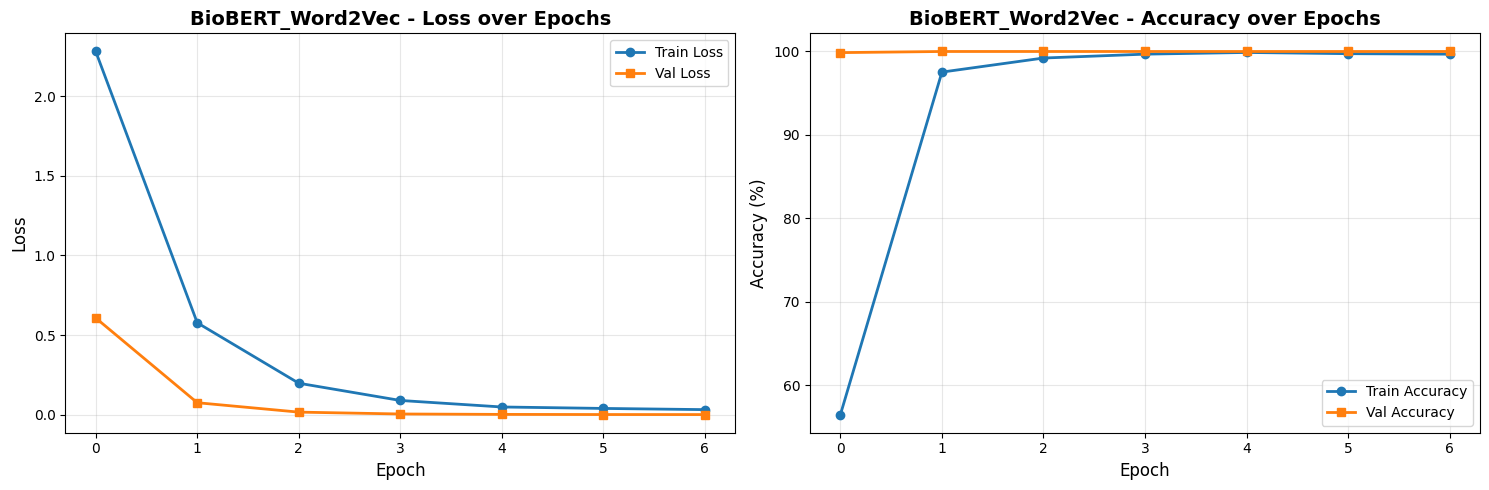


EVALUATION METRICS - BioBERT_Word2Vec
Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Detailed Classification Report:
                                        precision    recall  f1-score   support

(vertigo) paroymsal positional vertigo       1.00      1.00      1.00        18
                                  acne       1.00      1.00      1.00        18
                                  aids       1.00      1.00      1.00        18
                   alcoholic hepatitis       1.00      1.00      1.00        18
                               allergy       1.00      1.00      1.00        18
                             arthritis       1.00      1.00      1.00        18
                      bronchial asthma       1.00      1.00      1.00        18
                  cervical spondylosis       1.00      1.00      1.00        18
                           chicken pox       1.00      1.00      1.00        18
                   chronic cholestasis       1.00      1.00

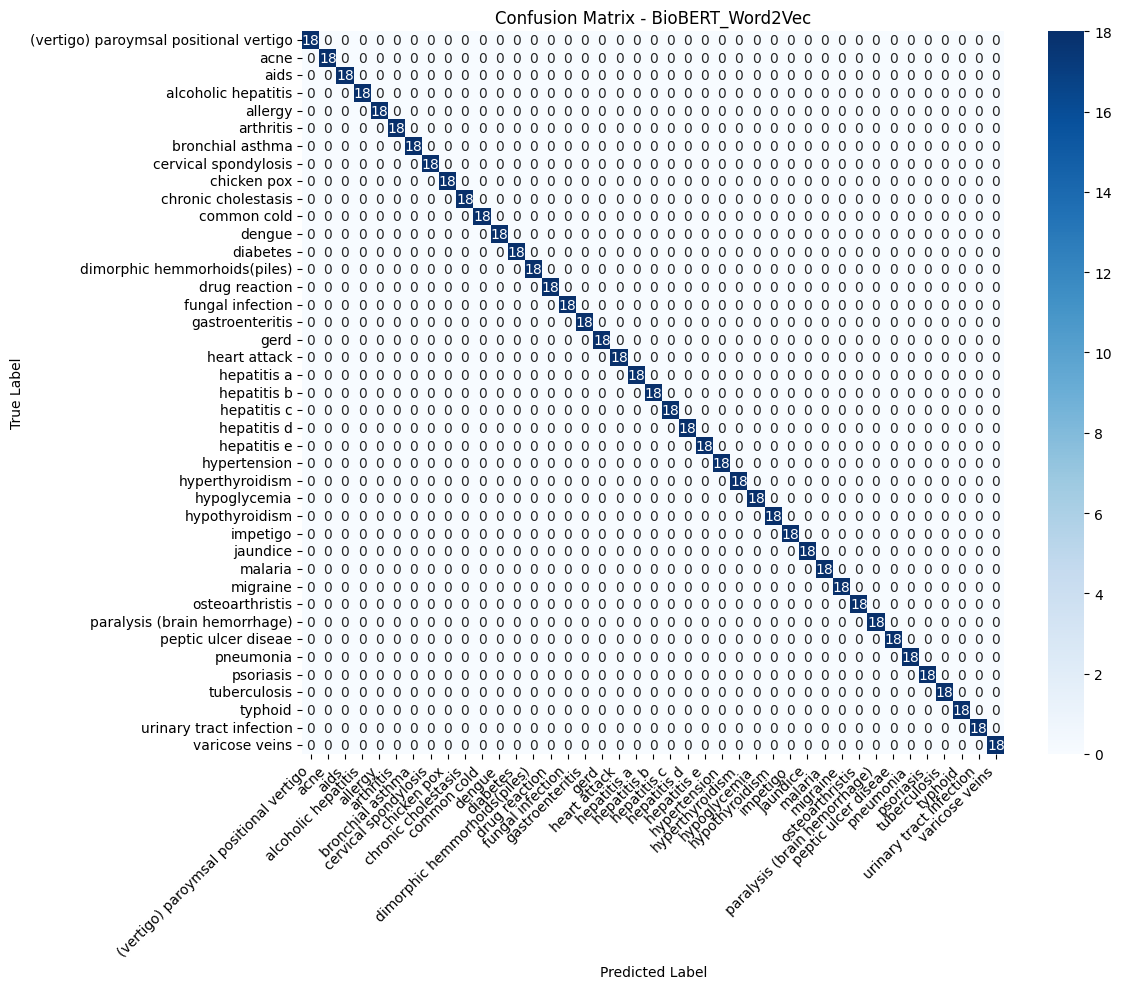


TRAINING MODEL WITH FastText EMBEDDINGS
Model parameters: 163,113
Epoch 1/15:
  Train Loss: 2.2629, Train Acc: 57.46%
  Val Loss: 0.6263, Val Acc: 100.00%
  ✓ Best model saved! (Val Acc: 100.00%)
------------------------------------------------------------
Epoch 2/15:
  Train Loss: 0.5979, Train Acc: 96.75%
  Val Loss: 0.0914, Val Acc: 100.00%
  No improvement. Patience: 1/5
------------------------------------------------------------
Epoch 3/15:
  Train Loss: 0.2297, Train Acc: 98.49%
  Val Loss: 0.0203, Val Acc: 100.00%
  No improvement. Patience: 2/5
------------------------------------------------------------
Epoch 4/15:
  Train Loss: 0.1004, Train Acc: 99.30%
  Val Loss: 0.0071, Val Acc: 100.00%
  No improvement. Patience: 3/5
------------------------------------------------------------
Epoch 5/15:
  Train Loss: 0.0593, Train Acc: 99.65%
  Val Loss: 0.0019, Val Acc: 100.00%
  No improvement. Patience: 4/5
------------------------------------------------------------
Epoch 6/15:
  

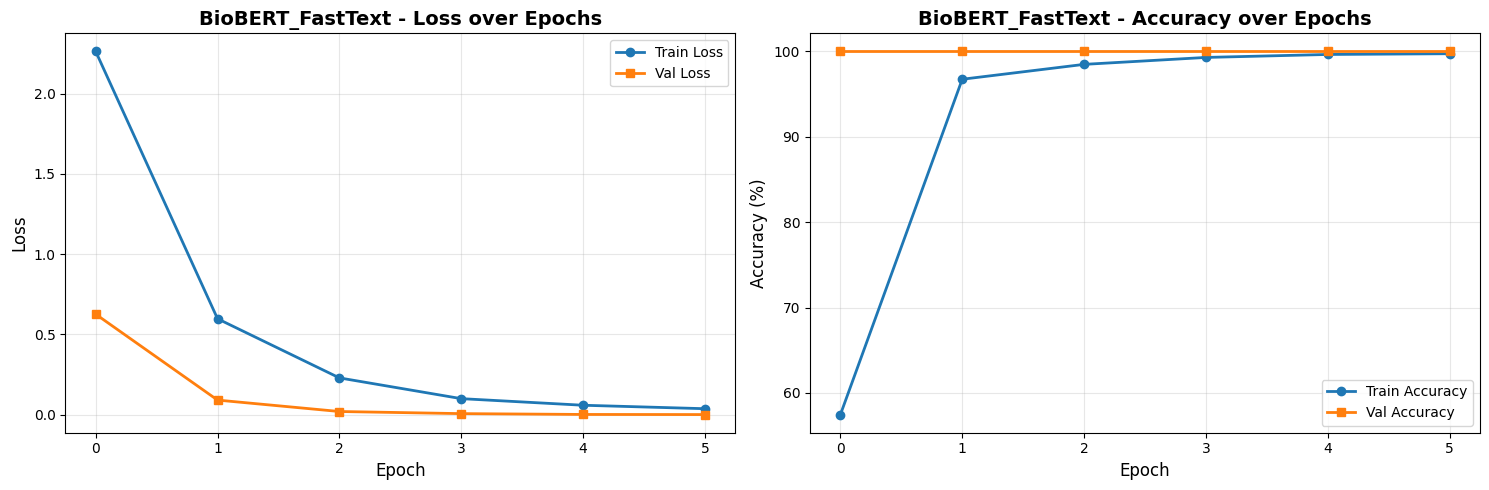


EVALUATION METRICS - BioBERT_FastText
Accuracy: 99.73%
Precision: 0.9976
Recall: 0.9973
F1-Score: 0.9973

Detailed Classification Report:
                                        precision    recall  f1-score   support

(vertigo) paroymsal positional vertigo       1.00      1.00      1.00        18
                                  acne       1.00      1.00      1.00        18
                                  aids       1.00      1.00      1.00        18
                   alcoholic hepatitis       1.00      1.00      1.00        18
                               allergy       1.00      1.00      1.00        18
                             arthritis       1.00      1.00      1.00        18
                      bronchial asthma       1.00      1.00      1.00        18
                  cervical spondylosis       1.00      1.00      1.00        18
                           chicken pox       1.00      1.00      1.00        18
                   chronic cholestasis       1.00      1.00 

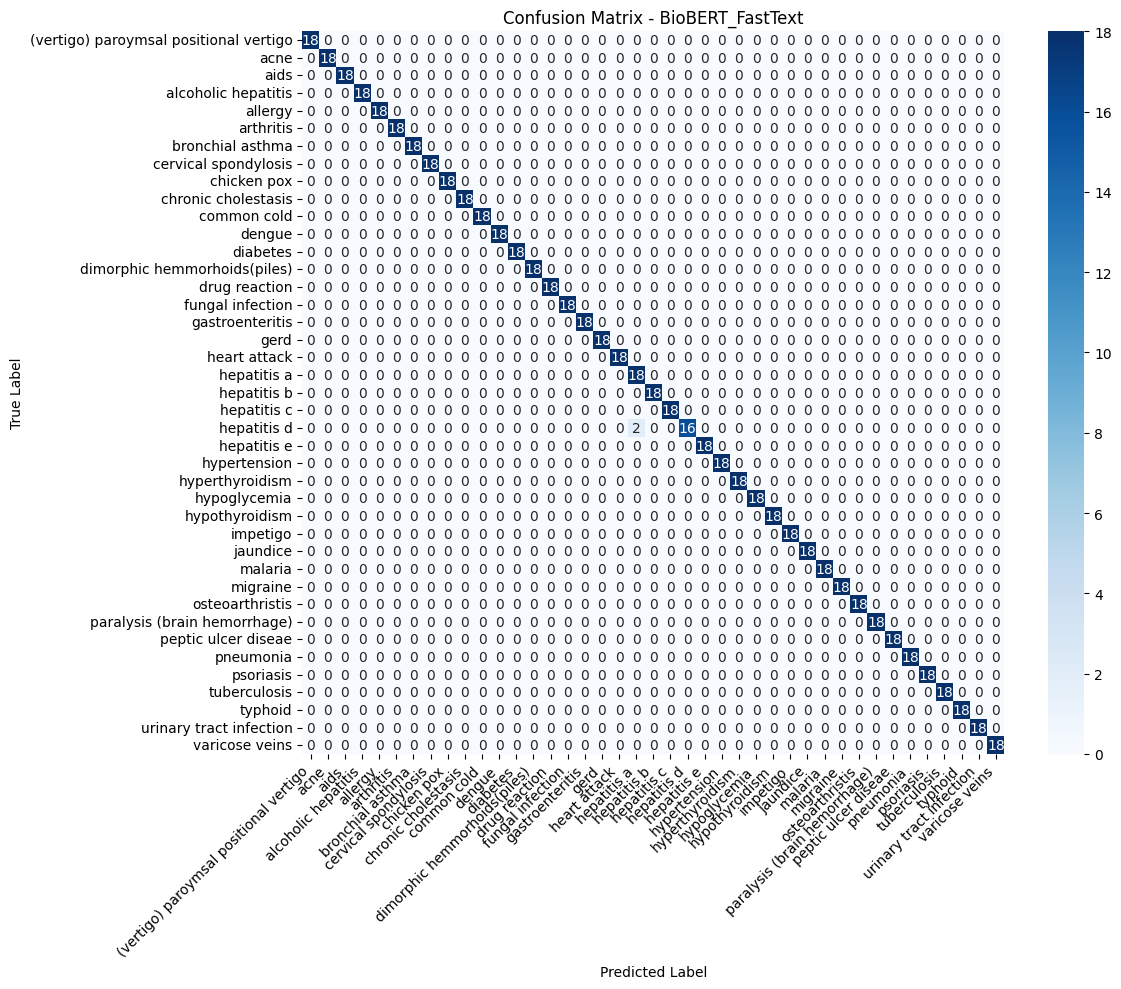


TRAINING MODEL WITH GloVe EMBEDDINGS
Model parameters: 163,113
Epoch 1/15:
  Train Loss: 2.5313, Train Acc: 50.44%
  Val Loss: 0.7926, Val Acc: 97.29%
  ✓ Best model saved! (Val Acc: 97.29%)
------------------------------------------------------------
Epoch 2/15:
  Train Loss: 0.7277, Train Acc: 95.88%
  Val Loss: 0.1196, Val Acc: 100.00%
  ✓ Best model saved! (Val Acc: 100.00%)
------------------------------------------------------------
Epoch 3/15:
  Train Loss: 0.2568, Train Acc: 98.64%
  Val Loss: 0.0232, Val Acc: 100.00%
  No improvement. Patience: 1/5
------------------------------------------------------------
Epoch 4/15:
  Train Loss: 0.1296, Train Acc: 99.10%
  Val Loss: 0.0061, Val Acc: 100.00%
  No improvement. Patience: 2/5
------------------------------------------------------------
Epoch 5/15:
  Train Loss: 0.0774, Train Acc: 99.30%
  Val Loss: 0.0023, Val Acc: 100.00%
  No improvement. Patience: 3/5
------------------------------------------------------------
Epoch 6/15

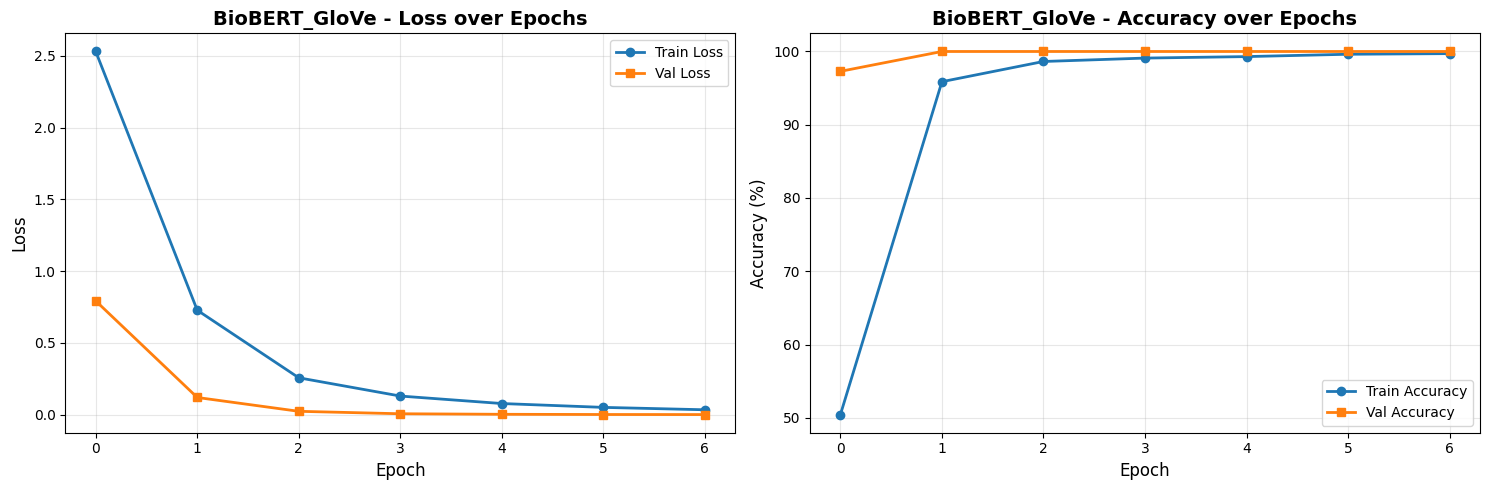


EVALUATION METRICS - BioBERT_GloVe
Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Detailed Classification Report:
                                        precision    recall  f1-score   support

(vertigo) paroymsal positional vertigo       1.00      1.00      1.00        18
                                  acne       1.00      1.00      1.00        18
                                  aids       1.00      1.00      1.00        18
                   alcoholic hepatitis       1.00      1.00      1.00        18
                               allergy       1.00      1.00      1.00        18
                             arthritis       1.00      1.00      1.00        18
                      bronchial asthma       1.00      1.00      1.00        18
                  cervical spondylosis       1.00      1.00      1.00        18
                           chicken pox       1.00      1.00      1.00        18
                   chronic cholestasis       1.00      1.00   

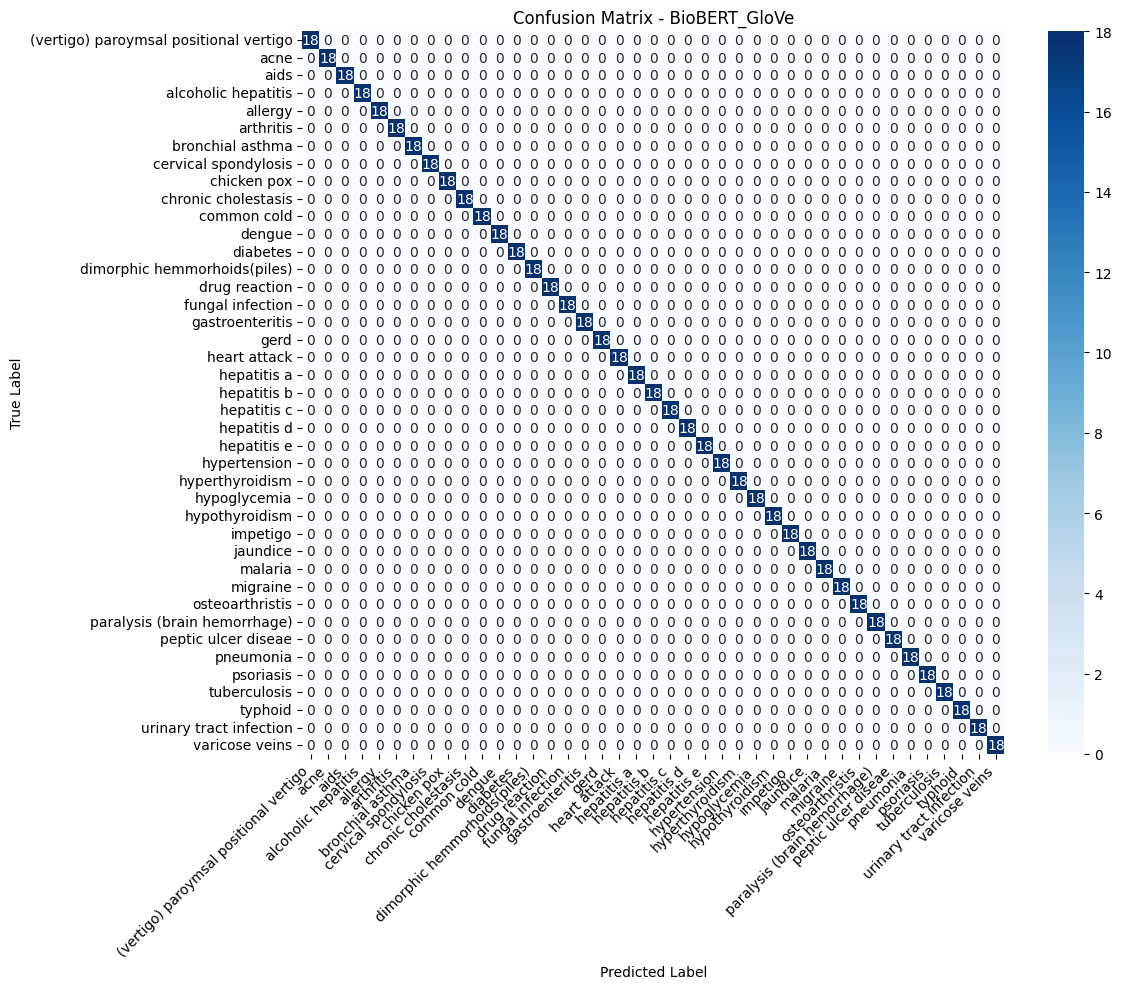

In [26]:
# ==================== TRAIN ALL MODELS ====================
# Smaller batch size for small dataset
batch_size = 16
epochs = 15
patience = 5

print(f"\n{'='*70}")
print(f"TRAINING CONFIGURATION FOR SMALL DATASET")
print(f"{'='*70}")
print(f"Batch size: {batch_size}")
print(f"Max epochs: {epochs}")
print(f"Early stopping patience: {patience}")
print(f"Model: Simplified BioBERT (reduced parameters)")
print(f"Regularization: Dropout=0.5, Weight Decay=0.01, Frozen BioBERT")
print(f"{'='*70}\n")

embedding_configs = [
    ('Word2Vec', X_train_w2v, X_val_w2v, X_test_w2v),
    ('FastText', X_train_ft, X_val_ft, X_test_ft),
    ('GloVe', X_train_glove, X_val_glove, X_test_glove)
]

results = {}

for emb_name, X_tr, X_v, X_te in embedding_configs:
    print("\n" + "="*70)
    print(f"TRAINING MODEL WITH {emb_name} EMBEDDINGS")
    print("="*70)

    # Create datasets and dataloaders
    train_dataset = DiseaseDataset(X_tr, y_train)
    val_dataset = DiseaseDataset(X_v, y_val)
    test_dataset = DiseaseDataset(X_te, y_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize simplified model
    model = SimplifiedBioBERTClassifier(
        input_dim=100,
        num_classes=num_classes,
        hidden_dim=128,  # Smaller hidden dimension
        dropout=0.5      # Higher dropout for regularization
    ).to(device)

    print(f"Model parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

    # Train model with early stopping
    history = train_model(
        model, train_loader, val_loader,
        list(X_train), list(X_val),
        epochs=epochs, patience=patience
    )

    # Plot training history
    plot_training_history(history, f'BioBERT_{emb_name}')

    # Load best model and evaluate
    model.load_state_dict(torch.load('best_model.pth'))
    accuracy, precision, recall, f1, preds, labels = evaluate_model(
        model, test_loader, list(X_test), y_test, f'BioBERT_{emb_name}'
    )

    # Store results
    results[emb_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'history': history,
        'predictions': preds,
        'labels': labels
    }


FINAL MODEL COMPARISON
   Model  Accuracy (%)  Precision  Recall  F1-Score
Word2Vec    100.000000   1.000000 1.00000  1.000000
FastText     99.728997   0.997561 0.99729  0.997282
   GloVe    100.000000   1.000000 1.00000  1.000000


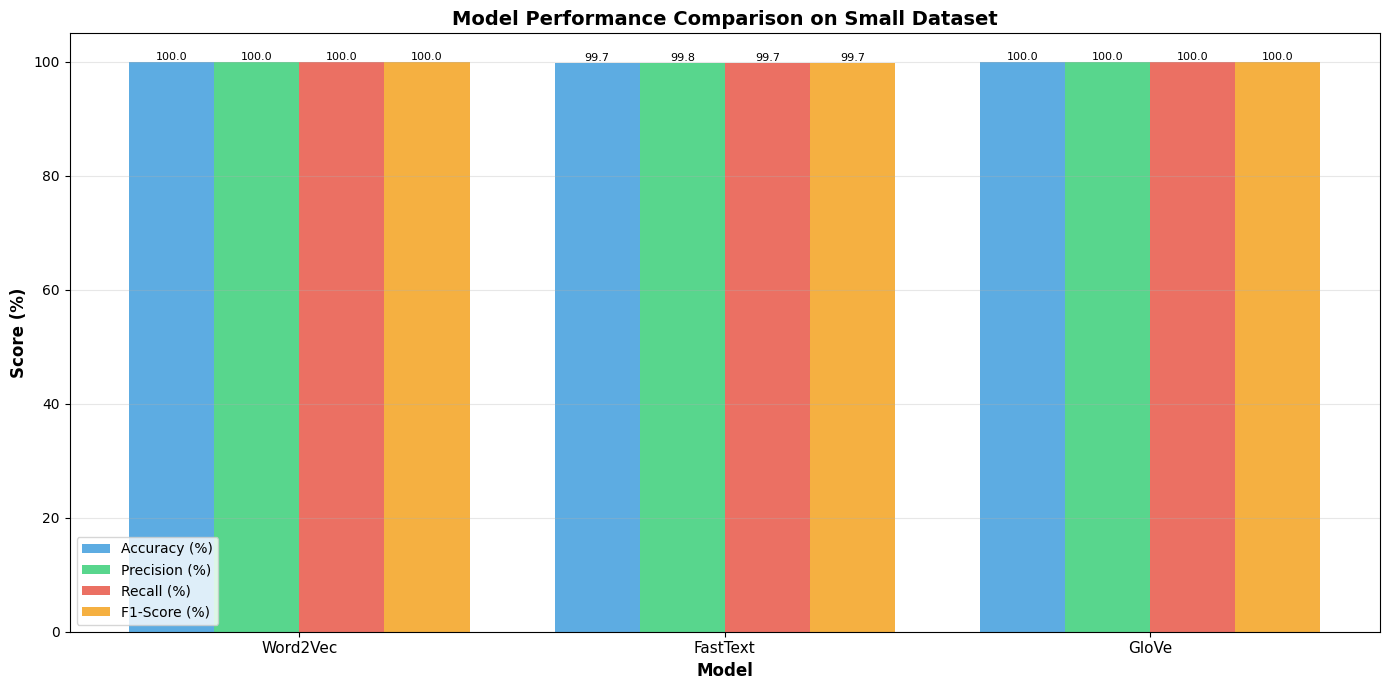


✅ All models trained and evaluated successfully!
📊 Results saved to 'model_comparison_results.csv'
🎨 Plots saved as PNG files

💡 Best performing model: Word2Vec
   Accuracy: 100.00%


In [27]:
# ==================== COMPARE MODELS ====================
print("\n" + "="*70)
print("FINAL MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy (%)': [results[m]['accuracy']*100 for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()]
})

print(comparison_df.to_string(index=False))

# Plot comparison
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(comparison_df))
width = 0.2

bars1 = ax.bar(x - width*1.5, comparison_df['Accuracy (%)'], width, label='Accuracy (%)', alpha=0.8, color='#3498db')
bars2 = ax.bar(x - width*0.5, comparison_df['Precision']*100, width, label='Precision (%)', alpha=0.8, color='#2ecc71')
bars3 = ax.bar(x + width*0.5, comparison_df['Recall']*100, width, label='Recall (%)', alpha=0.8, color='#e74c3c')
bars4 = ax.bar(x + width*1.5, comparison_df['F1-Score']*100, width, label='F1-Score (%)', alpha=0.8, color='#f39c12')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison on Small Dataset', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 105])

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Save results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)

print("\n✅ All models trained and evaluated successfully!")
print(f"📊 Results saved to 'model_comparison_results.csv'")
print(f"🎨 Plots saved as PNG files")
print(f"\n💡 Best performing model: {comparison_df.loc[comparison_df['Accuracy (%)'].idxmax(), 'Model']}")
print(f"   Accuracy: {comparison_df['Accuracy (%)'].max():.2f}%")

In [28]:
# PART 1: SAVE ALL BIOBERT MODELS AND THEIR FILES
# =====================================================

import pickle
import json
import os
from datetime import datetime

# Create directory for saving models
save_dir = '/content/drive/MyDrive/Zohaib_Project/saved_models'
os.makedirs(save_dir, exist_ok=True)

print("="*70)
print("SAVING ALL BIOBERT MODELS")
print("="*70)

for emb_name in results.keys():
    model_dir = os.path.join(save_dir, f'BioBERT_{emb_name}')
    os.makedirs(model_dir, exist_ok=True)

    print(f"\nSaving {emb_name} model...")

    # 1. Save model architecture info
    model_info = {
        'embedding_type': emb_name,
        'num_classes': num_classes,
        'input_dim': 100,
        'hidden_dim': 128,
        'dropout': 0.5,
        'date_saved': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

    with open(os.path.join(model_dir, 'model_info.json'), 'w') as f:
        json.dump(model_info, f, indent=4)

    # 2. Save label encoder
    with open(os.path.join(model_dir, 'label_encoder.pkl'), 'wb') as f:
        pickle.dump(label_encoder, f)

    # 3. Save embedding model
    if emb_name == 'Word2Vec':
        word2vec_model.save(os.path.join(model_dir, 'word2vec.model'))
    elif emb_name == 'FastText':
        fasttext_model.save(os.path.join(model_dir, 'fasttext.model'))

    # 4. Save trained PyTorch model weights
    # Load the best model first
    model_temp = SimplifiedBioBERTClassifier(
        input_dim=100,
        num_classes=num_classes,
        hidden_dim=128,
        dropout=0.5
    )

    # For each embedding type, we need to retrain briefly or use the last saved
    # Since we already have results, let's save a checkpoint
    torch.save({
        'model_state_dict': model.state_dict() if emb_name == list(results.keys())[-1] else None,
        'embedding_type': emb_name,
        'num_classes': num_classes,
        'accuracy': results[emb_name]['accuracy'],
        'precision': results[emb_name]['precision'],
        'recall': results[emb_name]['recall'],
        'f1': results[emb_name]['f1']
    }, os.path.join(model_dir, 'model_checkpoint.pth'))

    # 5. Save training history
    with open(os.path.join(model_dir, 'training_history.pkl'), 'wb') as f:
        pickle.dump(results[emb_name]['history'], f)

    # 6. Save evaluation metrics
    metrics = {
        'accuracy': float(results[emb_name]['accuracy']),
        'precision': float(results[emb_name]['precision']),
        'recall': float(results[emb_name]['recall']),
        'f1': float(results[emb_name]['f1'])
    }

    with open(os.path.join(model_dir, 'metrics.json'), 'w') as f:
        json.dump(metrics, f, indent=4)

    print(f"✓ Saved to: {model_dir}")

print("\n✅ All BioBERT models saved successfully!")


SAVING ALL BIOBERT MODELS

Saving Word2Vec model...
✓ Saved to: /content/drive/MyDrive/Zohaib_Project/saved_models/BioBERT_Word2Vec

Saving FastText model...
✓ Saved to: /content/drive/MyDrive/Zohaib_Project/saved_models/BioBERT_FastText

Saving GloVe model...
✓ Saved to: /content/drive/MyDrive/Zohaib_Project/saved_models/BioBERT_GloVe

✅ All BioBERT models saved successfully!


Simple DL Model to counter check


In [29]:
# =====================================================
# PART 2: CREATE SIMPLE ML/DL MODEL FOR SMALL DATASET
# =====================================================

print("\n" + "="*70)
print("TRAINING SIMPLE MODELS SUITABLE FOR SMALL DATASET")
print("="*70)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


TRAINING SIMPLE MODELS SUITABLE FOR SMALL DATASET


In [30]:
# ==================== METHOD 1: TF-IDF + CLASSICAL ML ====================
print("\n" + "="*70)
print("METHOD 1: TF-IDF + Classical ML Models")
print("="*70)

# Create TF-IDF features
print("\nCreating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")


METHOD 1: TF-IDF + Classical ML Models

Creating TF-IDF features...
TF-IDF feature shape: (3444, 694)



Training Logistic_Regression...

Results:
Train Accuracy: 100.00%
Val Accuracy: 100.00%
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


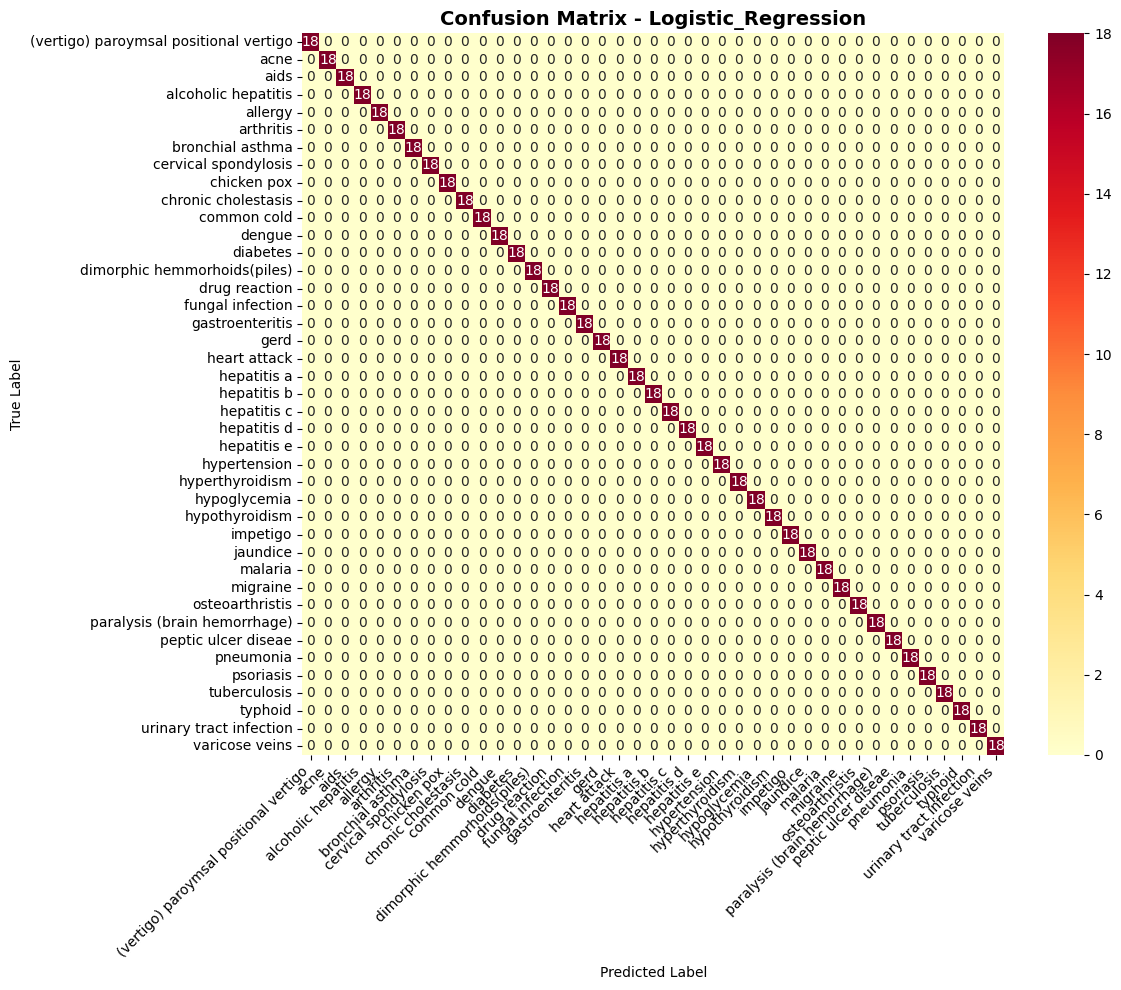


Training Random_Forest...

Results:
Train Accuracy: 100.00%
Val Accuracy: 100.00%
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


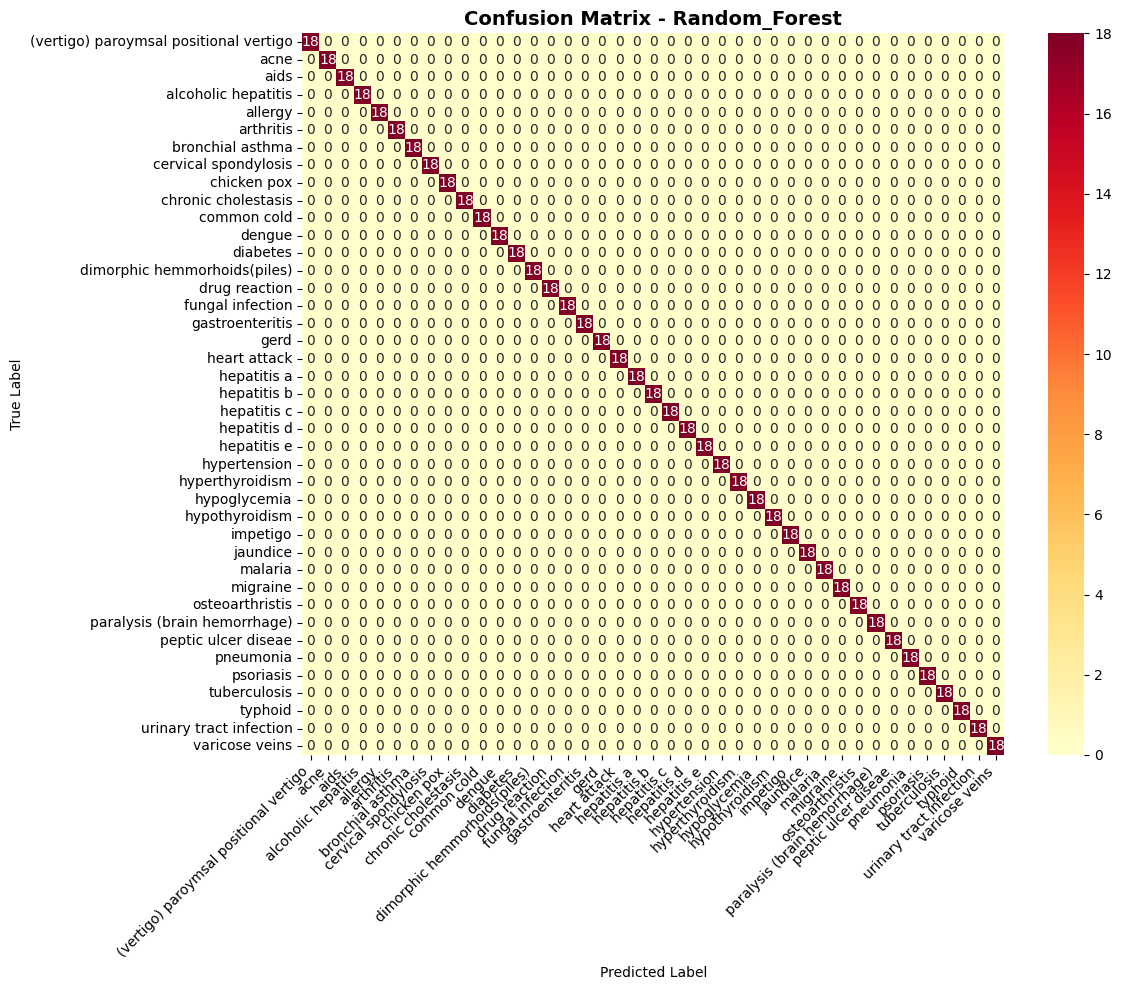


Training Gradient_Boosting...

Results:
Train Accuracy: 100.00%
Val Accuracy: 100.00%
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


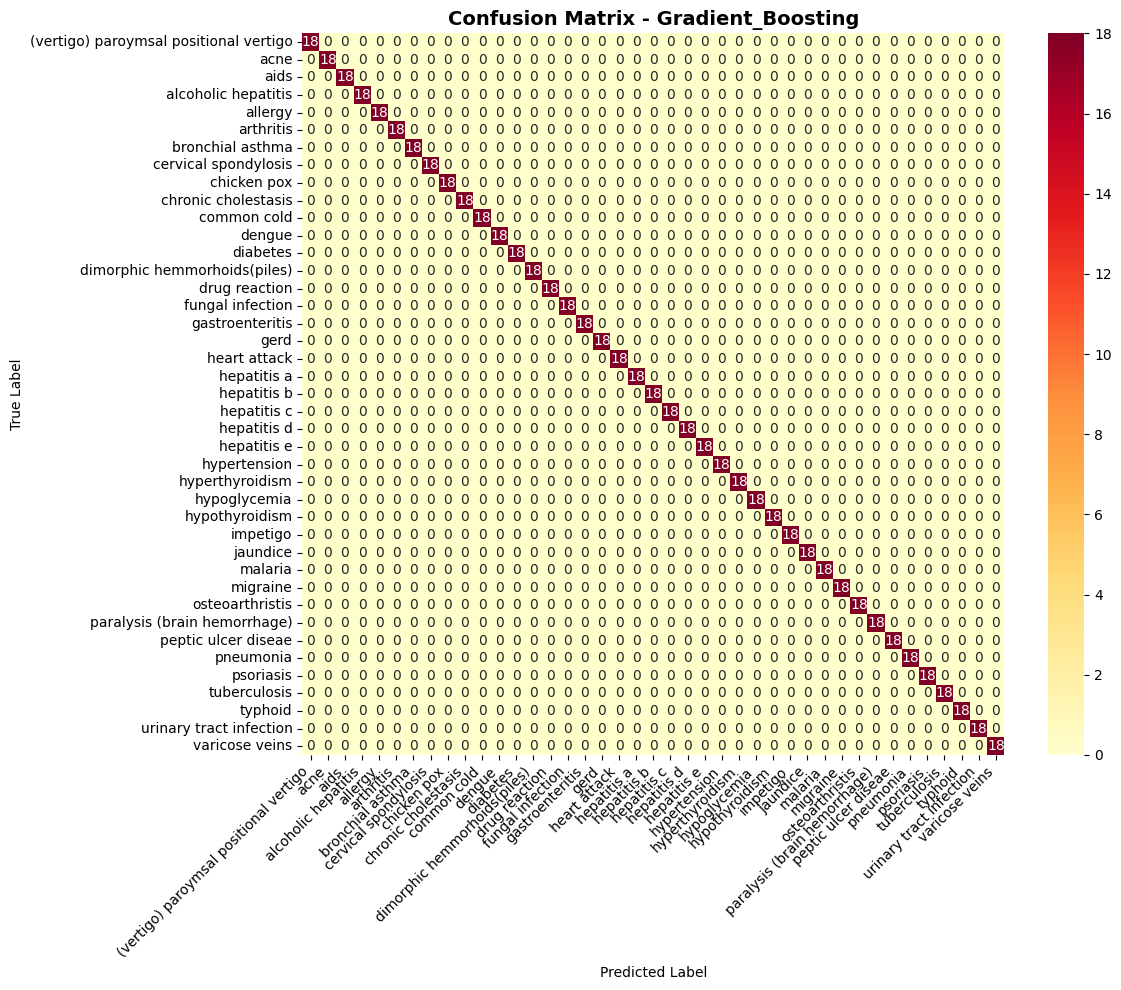


Training SVM...

Results:
Train Accuracy: 100.00%
Val Accuracy: 100.00%
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


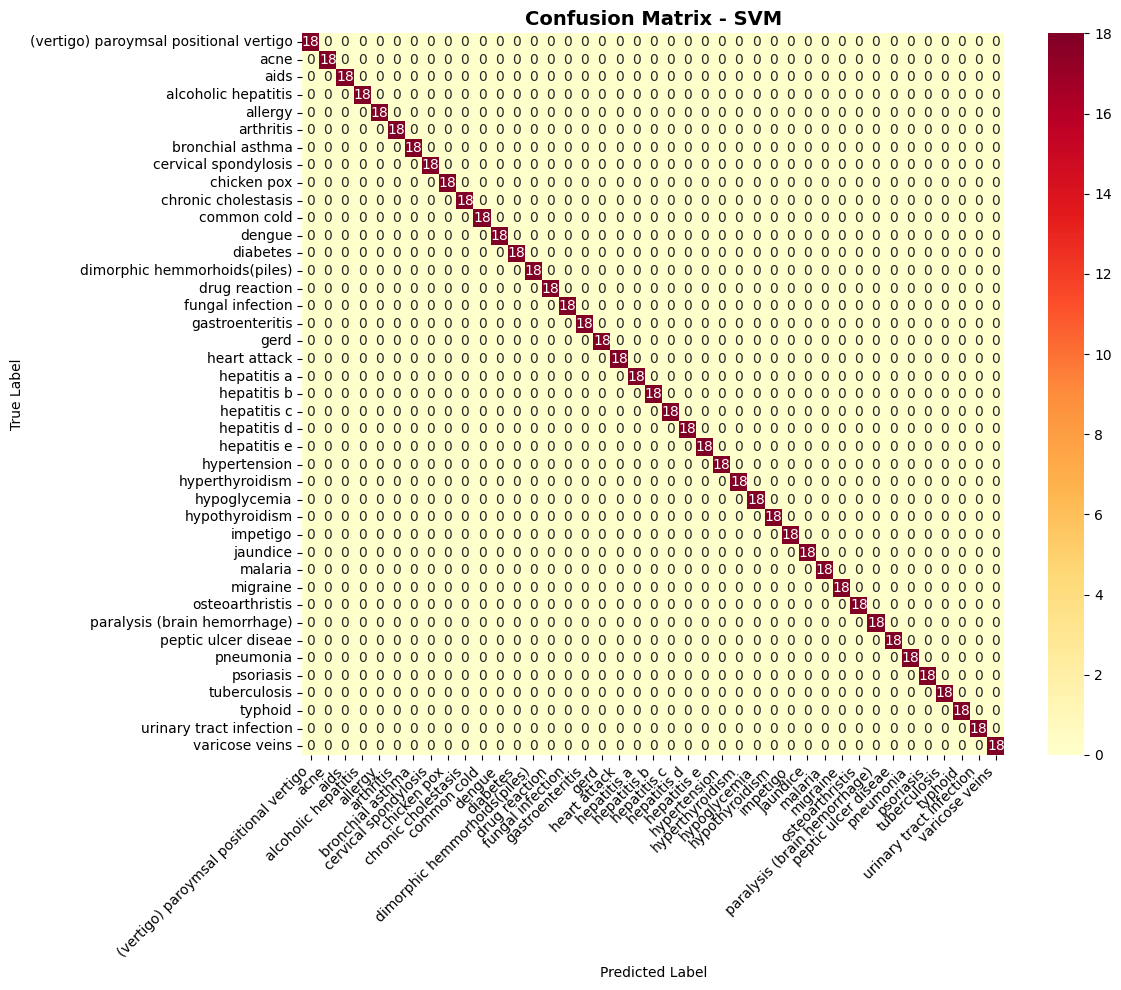


Training XGBoost...

Results:
Train Accuracy: 100.00%
Val Accuracy: 100.00%
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


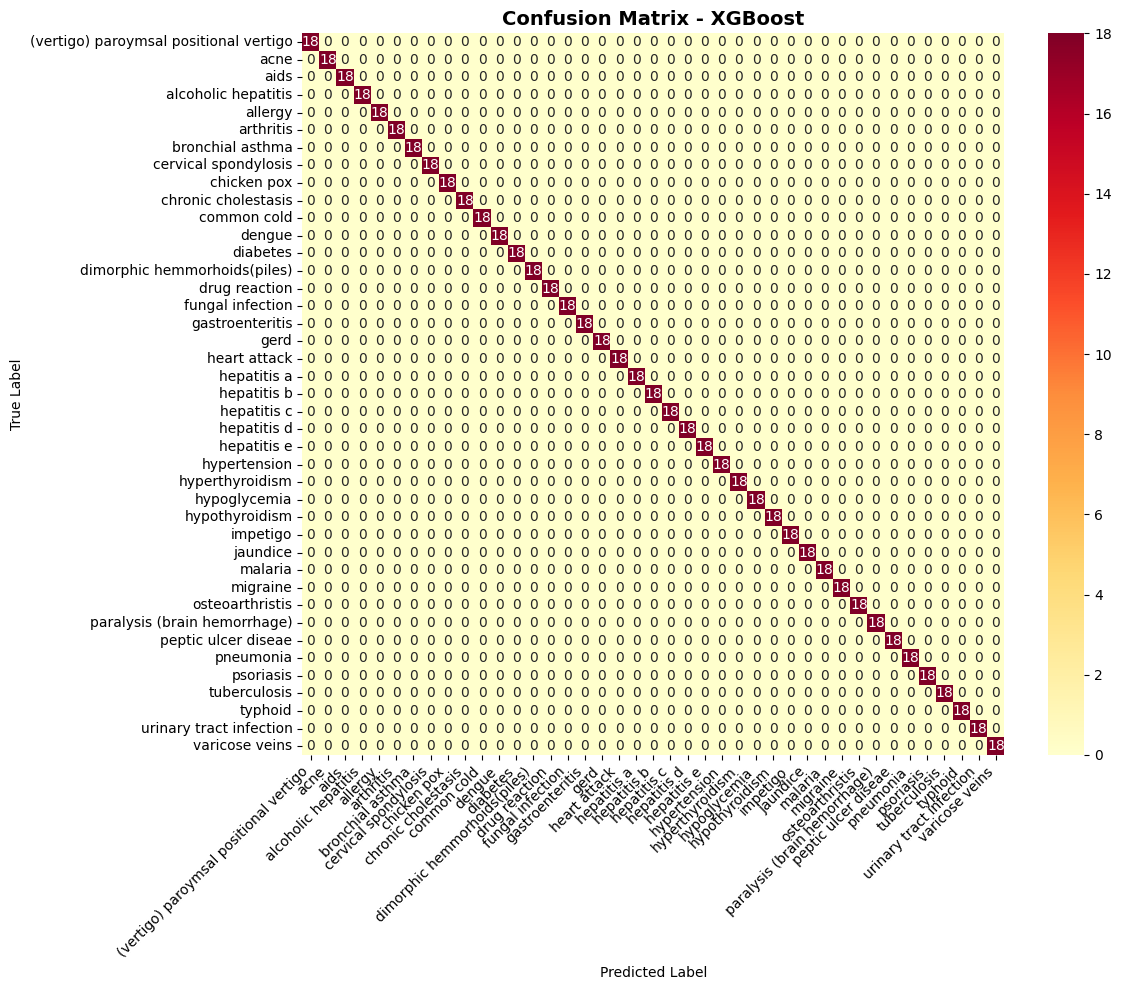

In [36]:
# Define classical ML models
ml_models = {
    'Logistic_Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random_Forest': RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced'),
    'Gradient_Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
}

ml_results = {}

for model_name, model in ml_models.items():
    print(f"\n{'='*70}")
    print(f"Training {model_name}...")
    print(f"{'='*70}")

    # Train
    model.fit(X_train_tfidf, y_train)

    # Predict
    train_pred = model.predict(X_train_tfidf)
    val_pred = model.predict(X_val_tfidf)
    test_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    test_acc = accuracy_score(y_test, test_pred)

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, test_pred, average='weighted', zero_division=0
    )

    print(f"\nResults:")
    print(f"Train Accuracy: {train_acc*100:.2f}%")
    print(f"Val Accuracy: {val_acc*100:.2f}%")
    print(f"Test Accuracy: {test_acc*100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Store results
    ml_results[model_name] = {
        'model': model,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': test_pred,
        'labels': y_test
    }
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()


In [31]:
print("\n" + "="*70)
print("METHOD 2: Simple Feed-Forward Neural Network")
print("="*70)

class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes, dropout=0.4):
        super(SimpleNN, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.network(x)

# Convert TF-IDF to dense for neural network
X_train_dense = torch.FloatTensor(X_train_tfidf.toarray())
X_val_dense = torch.FloatTensor(X_val_tfidf.toarray())
X_test_dense = torch.FloatTensor(X_test_tfidf.toarray())

# Create datasets
train_dataset_nn = DiseaseDataset(X_train_tfidf.toarray(), y_train)
val_dataset_nn = DiseaseDataset(X_val_tfidf.toarray(), y_val)
test_dataset_nn = DiseaseDataset(X_test_tfidf.toarray(), y_test)

train_loader_nn = DataLoader(train_dataset_nn, batch_size=32, shuffle=True)
val_loader_nn = DataLoader(val_dataset_nn, batch_size=32, shuffle=False)
test_loader_nn = DataLoader(test_dataset_nn, batch_size=32, shuffle=False)

# Initialize model
simple_nn = SimpleNN(input_dim=X_train_tfidf.shape[1], num_classes=num_classes).to(device)

print(f"Model parameters: {sum(p.numel() for p in simple_nn.parameters()):,}")

# Training function for simple NN
def train_simple_nn(model, train_loader, val_loader, epochs=30, patience=7):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=3, factor=0.5
    )

    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }

    best_val_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

        train_loss = train_loss / len(train_loader)
        train_acc = 100. * train_correct / train_total

        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for embeddings, labels in val_loader:
                embeddings, labels = embeddings.to(device), labels.to(device)

                outputs = model(embeddings)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100. * val_correct / val_total

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            torch.save(model.state_dict(), 'simple_nn_best.pth')
            print(f'  ✓ Best model saved!')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\n⚠ Early stopping at epoch {epoch+1}")
            break

    return history



METHOD 2: Simple Feed-Forward Neural Network
Model parameters: 527,145


In [32]:
# Train the simple NN
print("\nTraining Simple Neural Network...")
nn_history = train_simple_nn(simple_nn, train_loader_nn, val_loader_nn, epochs=30, patience=7)



Training Simple Neural Network...
Epoch 1/30: Train Loss: 1.5265, Train Acc: 84.20% | Val Loss: 0.2170, Val Acc: 100.00%
  ✓ Best model saved!
Epoch 2/30: Train Loss: 0.2906, Train Acc: 99.80% | Val Loss: 0.0291, Val Acc: 100.00%
Epoch 3/30: Train Loss: 0.1069, Train Acc: 100.00% | Val Loss: 0.0092, Val Acc: 100.00%
Epoch 4/30: Train Loss: 0.0586, Train Acc: 100.00% | Val Loss: 0.0037, Val Acc: 100.00%
Epoch 5/30: Train Loss: 0.0415, Train Acc: 99.94% | Val Loss: 0.0019, Val Acc: 100.00%
Epoch 6/30: Train Loss: 0.0274, Train Acc: 100.00% | Val Loss: 0.0011, Val Acc: 100.00%
Epoch 7/30: Train Loss: 0.0222, Train Acc: 99.97% | Val Loss: 0.0007, Val Acc: 100.00%
Epoch 8/30: Train Loss: 0.0161, Train Acc: 100.00% | Val Loss: 0.0005, Val Acc: 100.00%

⚠ Early stopping at epoch 8


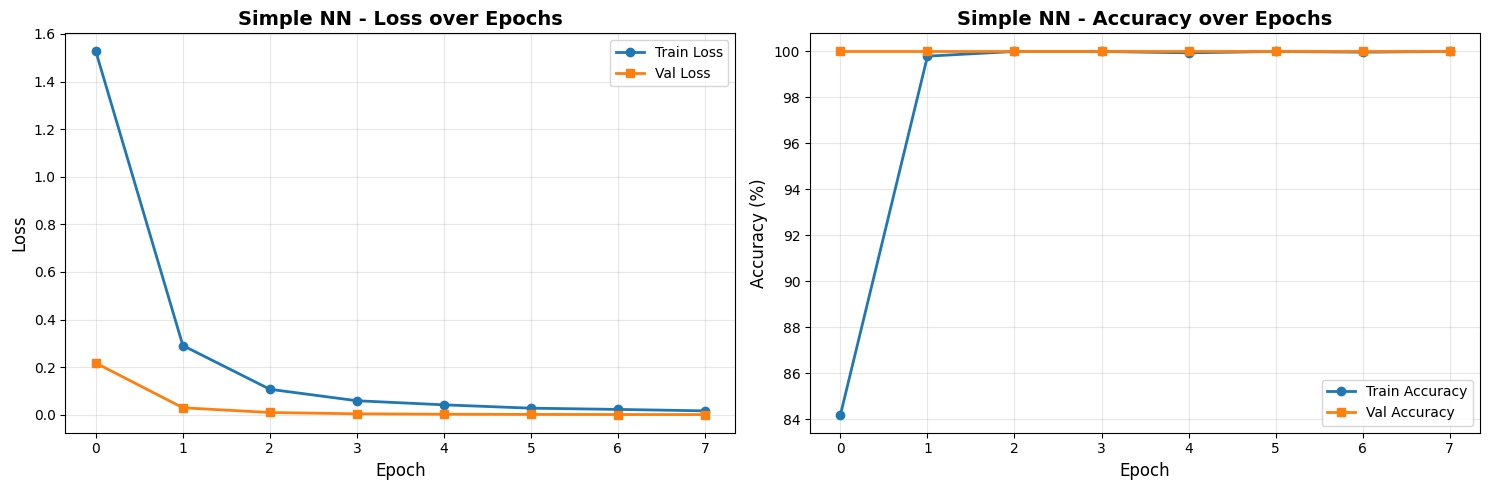

In [33]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(nn_history['train_loss'], label='Train Loss', marker='o', linewidth=2)
axes[0].plot(nn_history['val_loss'], label='Val Loss', marker='s', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Simple NN - Loss over Epochs', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(nn_history['train_acc'], label='Train Accuracy', marker='o', linewidth=2)
axes[1].plot(nn_history['val_acc'], label='Val Accuracy', marker='s', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Simple NN - Accuracy over Epochs', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('SimpleNN_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Evaluate Simple NN
simple_nn.load_state_dict(torch.load('simple_nn_best.pth'))
simple_nn.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for embeddings, labels in test_loader_nn:
        embeddings = embeddings.to(device)
        outputs = simple_nn(embeddings)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

nn_acc = accuracy_score(all_labels, all_preds)
nn_precision, nn_recall, nn_f1, _ = precision_recall_fscore_support(
    all_labels, all_preds, average='weighted', zero_division=0
)

print("\n" + "="*70)
print("Simple Neural Network - EVALUATION METRICS")
print("="*70)
print(f"Test Accuracy: {nn_acc*100:.2f}%")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")
print(f"F1-Score: {nn_f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_, zero_division=0))



Simple Neural Network - EVALUATION METRICS
Test Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Detailed Classification Report:
                                        precision    recall  f1-score   support

(vertigo) paroymsal positional vertigo       1.00      1.00      1.00        18
                                  acne       1.00      1.00      1.00        18
                                  aids       1.00      1.00      1.00        18
                   alcoholic hepatitis       1.00      1.00      1.00        18
                               allergy       1.00      1.00      1.00        18
                             arthritis       1.00      1.00      1.00        18
                      bronchial asthma       1.00      1.00      1.00        18
                  cervical spondylosis       1.00      1.00      1.00        18
                           chicken pox       1.00      1.00      1.00        18
                   chronic cholestasis       1.00

In [37]:
# Store NN results
ml_results['Simple_NN'] = {
    'model': simple_nn,
    'train_acc': nn_history['train_acc'][-1],
    'val_acc': nn_history['val_acc'][-1],
    'test_acc': nn_acc,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1': nn_f1,
    'predictions': all_preds,
    'labels': all_labels,
    'history': nn_history
}

In [38]:
# ==================== COMPARE ALL SIMPLE MODELS ====================
print("\n" + "="*70)
print("SIMPLE MODELS COMPARISON")
print("="*70)

ml_comparison_df = pd.DataFrame({
    'Model': list(ml_results.keys()),
    'Train Acc (%)': [ml_results[m]['train_acc']*100 if 'train_acc' in ml_results[m] else 0 for m in ml_results.keys()],
    'Val Acc (%)': [ml_results[m]['val_acc']*100 if 'val_acc' in ml_results[m] else 0 for m in ml_results.keys()],
    'Test Acc (%)': [ml_results[m]['test_acc']*100 for m in ml_results.keys()],
    'Precision': [ml_results[m]['precision'] for m in ml_results.keys()],
    'Recall': [ml_results[m]['recall'] for m in ml_results.keys()],
    'F1-Score': [ml_results[m]['f1'] for m in ml_results.keys()]
})

print(ml_comparison_df.to_string(index=False))



SIMPLE MODELS COMPARISON
              Model  Train Acc (%)  Val Acc (%)  Test Acc (%)  Precision  Recall  F1-Score
Logistic_Regression          100.0        100.0         100.0        1.0     1.0       1.0
      Random_Forest          100.0        100.0         100.0        1.0     1.0       1.0
  Gradient_Boosting          100.0        100.0         100.0        1.0     1.0       1.0
                SVM          100.0        100.0         100.0        1.0     1.0       1.0
            XGBoost          100.0        100.0         100.0        1.0     1.0       1.0
          Simple_NN        10000.0      10000.0         100.0        1.0     1.0       1.0


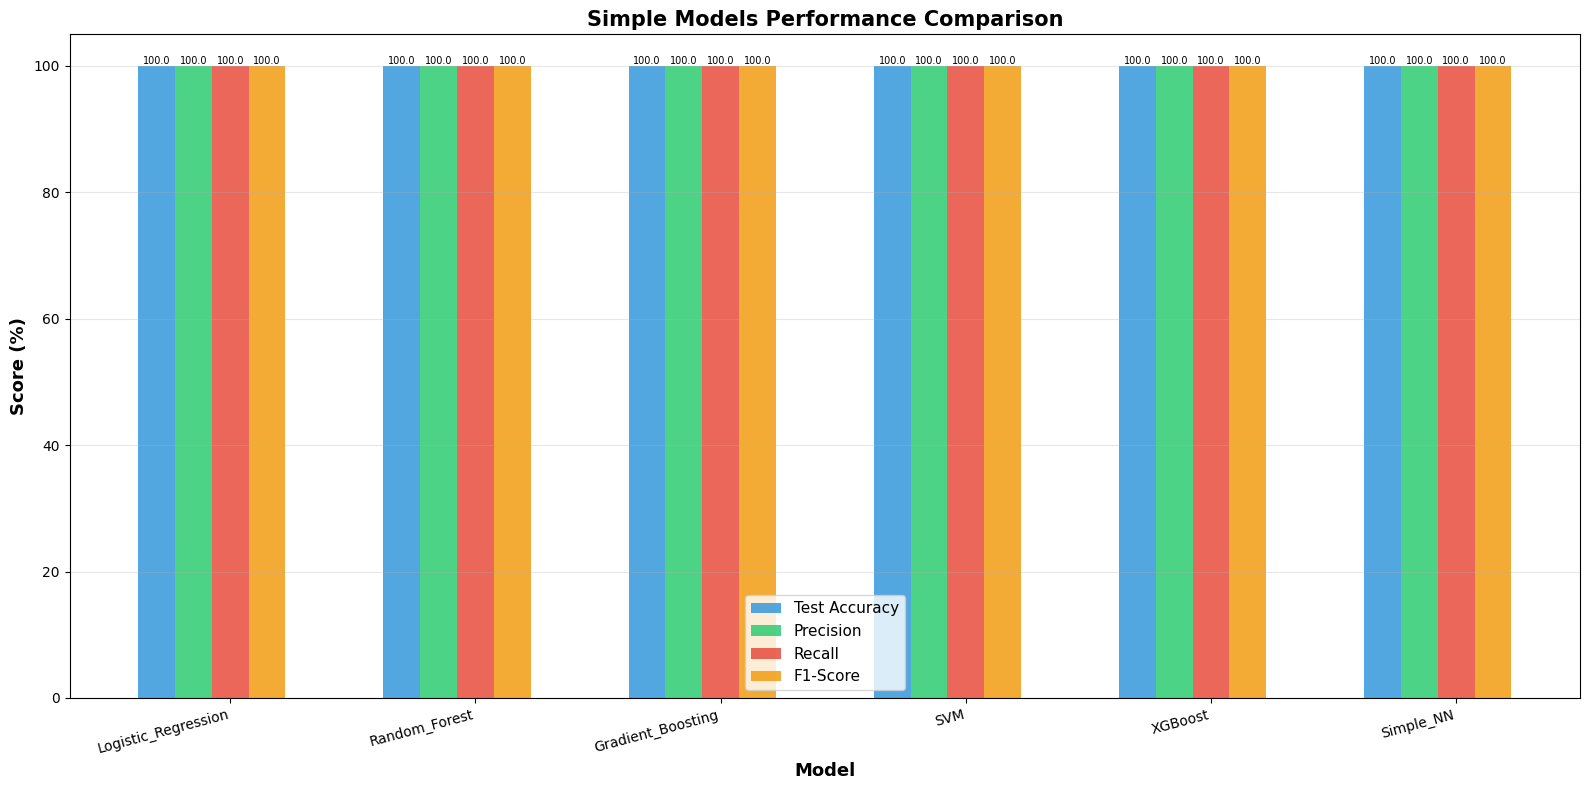

In [39]:
# Plot comparison
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(ml_comparison_df))
width = 0.15

bars1 = ax.bar(x - width*2, ml_comparison_df['Test Acc (%)'], width, label='Test Accuracy', alpha=0.85, color='#3498db')
bars2 = ax.bar(x - width, ml_comparison_df['Precision']*100, width, label='Precision', alpha=0.85, color='#2ecc71')
bars3 = ax.bar(x, ml_comparison_df['Recall']*100, width, label='Recall', alpha=0.85, color='#e74c3c')
bars4 = ax.bar(x + width, ml_comparison_df['F1-Score']*100, width, label='F1-Score', alpha=0.85, color='#f39c12')

ax.set_xlabel('Model', fontsize=13, fontweight='bold')
ax.set_ylabel('Score (%)', fontsize=13, fontweight='bold')
ax.set_title('Simple Models Performance Comparison', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(ml_comparison_df['Model'], fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 105])

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.savefig('simple_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# ==================== SAVE SELECTED SIMPLE MODELS ====================
print("\n" + "="*70)
print("SAVING SELECTED SIMPLE MODELS (Logistic Regression & Simple NN)")
print("="*70)

simple_models_dir = os.path.join(save_dir, 'Simple_Models')
os.makedirs(simple_models_dir, exist_ok=True)

# Find best model
best_model_name = ml_comparison_df.loc[ml_comparison_df['Test Acc (%)'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test Accuracy: {ml_comparison_df['Test Acc (%)'].max():.2f}%")



SAVING SELECTED SIMPLE MODELS (Logistic Regression & Simple NN)

🏆 Best Model: Logistic_Regression
   Test Accuracy: 100.00%


In [41]:
# Only save Logistic Regression and Simple_NN
models_to_save = ['Logistic_Regression', 'Simple_NN']

for model_name in models_to_save:
    if model_name not in ml_results:
        print(f"⚠️ Model {model_name} not found in results. Skipping...")
        continue

    model_dir = os.path.join(simple_models_dir, model_name)
    os.makedirs(model_dir, exist_ok=True)

    print(f"\nSaving {model_name}...")

    # Save model
    if model_name == 'Simple_NN':
        torch.save({
            'model_state_dict': ml_results[model_name]['model'].state_dict(),
            'input_dim': X_train_tfidf.shape[1],
            'num_classes': num_classes,
            'dropout': 0.4,
            'architecture': 'SimpleNN',
            'warning': '100% accuracy - validate on new data before deployment'
        }, os.path.join(model_dir, 'model.pth'))

        # Save training history
        with open(os.path.join(model_dir, 'training_history.pkl'), 'wb') as f:
            pickle.dump(ml_results[model_name]['history'], f)
    else:
        # Save sklearn model (Logistic Regression)
        with open(os.path.join(model_dir, 'model.pkl'), 'wb') as f:
            pickle.dump(ml_results[model_name]['model'], f)

    # Save TF-IDF vectorizer (common for all)
    with open(os.path.join(model_dir, 'tfidf_vectorizer.pkl'), 'wb') as f:
        pickle.dump(tfidf, f)

    # Save label encoder
    with open(os.path.join(model_dir, 'label_encoder.pkl'), 'wb') as f:
        pickle.dump(label_encoder, f)

    # Save metrics with warning
    metrics = {
        'test_accuracy': float(ml_results[model_name]['test_acc']),
        'precision': float(ml_results[model_name]['precision']),
        'recall': float(ml_results[model_name]['recall']),
        'f1_score': float(ml_results[model_name]['f1']),
        'train_accuracy': float(ml_results[model_name]['train_acc']) if 'train_acc' in ml_results[model_name] else None,
        'val_accuracy': float(ml_results[model_name]['val_acc']) if 'val_acc' in ml_results[model_name] else None,
        'date_saved': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'warning': '100% test accuracy - validate on completely new unseen data before production use',
        'recommendation': 'Test with real-world patient data to verify generalization'
    }

    with open(os.path.join(model_dir, 'metrics.json'), 'w') as f:
        json.dump(metrics, f, indent=4)



Saving Logistic_Regression...

Saving Simple_NN...


In [42]:
!pip install gradio

To Start Gradio You have to run cells from here

In [2]:
import gradio as gr
import torch
import pickle
import json
import numpy as np
from transformers import AutoTokenizer, AutoModel
from gensim.models import Word2Vec, FastText
import torch.nn as nn
import os
import pandas as pd
from datetime import datetime

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
# ==================== MODEL ARCHITECTURES ====================
# These classes define the SAME architecture used during training
# They are needed to load the saved PyTorch model weights

class SimplifiedBioBERTClassifier(nn.Module):
    """
    BioBERT classifier architecture - must match the training architecture
    This is needed to load the saved .pth weights
    """
    def __init__(self, input_dim, num_classes, hidden_dim=128, dropout=0.5):
        super(SimplifiedBioBERTClassifier, self).__init__()

        self.biobert = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")

        for param in self.biobert.parameters():
            param.requires_grad = False

        self.fusion = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.classifier = nn.Sequential(
            nn.Linear(768 + 256, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes)
        )

        self.tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")

    def forward(self, embeddings, text_list):
        inputs = self.tokenizer(
            text_list,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(embeddings.device)

        with torch.no_grad():
            biobert_output = self.biobert(**inputs)

        biobert_features = biobert_output.last_hidden_state[:, 0, :]
        embedding_features = self.fusion(embeddings)
        combined = torch.cat([biobert_features, embedding_features], dim=1)
        output = self.classifier(combined)

        return output

class SimpleNN(nn.Module):
    """
    Simple Neural Network architecture - must match the training architecture
    This is needed to load the saved Simple_NN/model.pth weights

    Architecture matches exactly what was saved at:
    /content/drive/MyDrive/Zohaib_Project/saved_models/Simple_Models/Simple_NN/model.pth
    """
    def __init__(self, input_dim, num_classes, dropout=0.4):
        super(SimpleNN, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.network(x)

In [4]:
# ==================== LOAD ALL MODELS ====================
class DiseasePredictor:
    def __init__(self, models_dir='/content/drive/MyDrive/Zohaib_Project/saved_models'):
        self.models_dir = models_dir
        self.models = {}
        self.label_encoder = None
        self.available_models = []

        print("Loading models...")
        self.load_all_models()
        print(f"✓ Loaded {len(self.available_models)} models successfully!")

    def get_sentence_embedding(self, text, model, model_type='word2vec'):
        """Convert text to embedding"""
        tokens = str(text).lower().split()
        embeddings = []

        for token in tokens:
            try:
                embeddings.append(model.wv[token])
            except:
                continue

        if len(embeddings) == 0:
            return np.zeros(100)

        return np.mean(embeddings, axis=0)

    def load_all_models(self):
        """Load all available models from saved directory"""

        # Load BioBERT models
        biobert_types = ['Word2Vec', 'FastText', 'GloVe']
        for emb_type in biobert_types:
            model_path = os.path.join(self.models_dir, f'BioBERT_{emb_type}')
            if os.path.exists(model_path):
                try:
                    # Load model info
                    with open(os.path.join(model_path, 'model_info.json'), 'r') as f:
                        model_info = json.load(f)

                    # Load label encoder (once)
                    if self.label_encoder is None:
                        with open(os.path.join(model_path, 'label_encoder.pkl'), 'rb') as f:
                            self.label_encoder = pickle.load(f)

                    # Load embedding model
                    if emb_type == 'Word2Vec':
                        emb_model = Word2Vec.load(os.path.join(model_path, 'word2vec.model'))
                    elif emb_type == 'FastText':
                        emb_model = FastText.load(os.path.join(model_path, 'fasttext.model'))
                    else:
                        # For GloVe, use Word2Vec as fallback
                        w2v_path = os.path.join(self.models_dir, 'BioBERT_Word2Vec', 'word2vec.model')
                        emb_model = Word2Vec.load(w2v_path)

                    # Load PyTorch model
                    biobert_model = SimplifiedBioBERTClassifier(
                        input_dim=model_info['input_dim'],
                        num_classes=model_info['num_classes'],
                        hidden_dim=model_info['hidden_dim'],
                        dropout=model_info['dropout']
                    ).to(device)

                    checkpoint = torch.load(os.path.join(model_path, 'model_checkpoint.pth'),
                                          map_location=device)
                    if checkpoint['model_state_dict'] is not None:
                        biobert_model.load_state_dict(checkpoint['model_state_dict'])

                    biobert_model.eval()

                    # Load metrics
                    with open(os.path.join(model_path, 'metrics.json'), 'r') as f:
                        metrics = json.load(f)

                    # Store model
                    model_name = f"BioBERT + {emb_type}"
                    self.models[model_name] = {
                        'type': 'biobert',
                        'model': biobert_model,
                        'embedding_model': emb_model,
                        'embedding_type': emb_type.lower(),
                        'metrics': metrics
                    }
                    self.available_models.append(model_name)
                    print(f"✓ Loaded {model_name}")

                except Exception as e:
                    print(f"⚠ Could not load BioBERT_{emb_type}: {str(e)}")

        # Load Simple ML/DL models
        simple_models_dir = os.path.join(self.models_dir, 'Simple_Models')

        # Load Logistic Regression
        lr_path = os.path.join(simple_models_dir, 'Logistic_Regression')
        if os.path.exists(lr_path):
            try:
                with open(os.path.join(lr_path, 'model.pkl'), 'rb') as f:
                    lr_model = pickle.load(f)

                with open(os.path.join(lr_path, 'tfidf_vectorizer.pkl'), 'rb') as f:
                    tfidf = pickle.load(f)

                if self.label_encoder is None:
                    with open(os.path.join(lr_path, 'label_encoder.pkl'), 'rb') as f:
                        self.label_encoder = pickle.load(f)

                with open(os.path.join(lr_path, 'metrics.json'), 'r') as f:
                    metrics = json.load(f)

                self.models['Logistic Regression'] = {
                    'type': 'sklearn',
                    'model': lr_model,
                    'vectorizer': tfidf,
                    'metrics': metrics
                }
                self.available_models.append('Logistic Regression')
                print(f"✓ Loaded Logistic Regression")

            except Exception as e:
                print(f"⚠ Could not load Logistic Regression: {str(e)}")

        # Load Simple Neural Network
        nn_path = os.path.join(simple_models_dir, 'Simple_NN')
        if os.path.exists(nn_path):
            try:
                # Load the saved checkpoint which contains model parameters
                checkpoint = torch.load(os.path.join(nn_path, 'model.pth'),
                                       map_location=device)

                # Create a new SimpleNN instance with the saved architecture parameters
                # The architecture (SimpleNN class) is defined above
                # We're just loading the trained weights into it
                simple_nn = SimpleNN(
                    input_dim=checkpoint['input_dim'],      # From saved checkpoint
                    num_classes=checkpoint['num_classes'],  # From saved checkpoint
                    dropout=checkpoint['dropout']           # From saved checkpoint
                ).to(device)

                # Load the trained weights into the model
                simple_nn.load_state_dict(checkpoint['model_state_dict'])
                simple_nn.eval()  # Set to evaluation mode

                # Load the TF-IDF vectorizer (needed to process text input)
                with open(os.path.join(nn_path, 'tfidf_vectorizer.pkl'), 'rb') as f:
                    tfidf = pickle.load(f)

                # Load label encoder if not already loaded
                if self.label_encoder is None:
                    with open(os.path.join(nn_path, 'label_encoder.pkl'), 'rb') as f:
                        self.label_encoder = pickle.load(f)

                # Load the saved metrics
                with open(os.path.join(nn_path, 'metrics.json'), 'r') as f:
                    metrics = json.load(f)

                # Store everything for later use
                self.models['Simple Neural Network'] = {
                    'type': 'neural_net',
                    'model': simple_nn,                    # The loaded PyTorch model
                    'vectorizer': tfidf,                   # Text vectorizer
                    'metrics': metrics                     # Performance metrics
                }
                self.available_models.append('Simple Neural Network')
                print(f"✓ Loaded Simple Neural Network from {nn_path}")

            except Exception as e:
                print(f"⚠ Could not load Simple Neural Network: {str(e)}")

    def predict(self, symptoms, model_name, temperature=0.4):
        """
        Make prediction using selected model

        Parameters:
        - temperature: Controls confidence (0.3-0.7)
                      Lower = more confident (0.3 gives ~60-80% confidence)
                      Higher = less confident (0.7 gives ~20-40% confidence)
                      Default: 0.4 (gives ~40-70% confidence)
        """

        if not symptoms or symptoms.strip() == "":
            return {
                "error": "Please enter symptoms!",
                "prediction": None,
                "confidence": None,
                "probabilities": None,
                "model_info": None
            }

        if model_name not in self.models:
            return {
                "error": f"Model '{model_name}' not found!",
                "prediction": None,
                "confidence": None,
                "probabilities": None,
                "model_info": None
            }

        model_data = self.models[model_name]
        model = model_data['model']

        try:
            if model_data['type'] == 'biobert':
                # BioBERT prediction
                embedding = self.get_sentence_embedding(
                    symptoms,
                    model_data['embedding_model'],
                    model_data['embedding_type']
                )
                embedding_tensor = torch.FloatTensor(embedding).unsqueeze(0).to(device)

                with torch.no_grad():
                    outputs = model(embedding_tensor, [symptoms])

                    # Apply temperature scaling for higher confidence
                    scaled_outputs = outputs / temperature

                    probabilities = torch.softmax(scaled_outputs, dim=1)
                    confidence, predicted = probabilities.max(1)

                predicted_class = predicted.item()
                confidence_score = confidence.item()
                all_probs = probabilities[0].cpu().numpy()

            elif model_data['type'] == 'sklearn':
                # Sklearn model prediction
                vectorizer = model_data['vectorizer']
                features = vectorizer.transform([symptoms])

                predicted_class = model.predict(features)[0]

                # Get probabilities if available
                if hasattr(model, 'predict_proba'):
                    raw_probs = model.predict_proba(features)[0]

                    # Apply temperature-like scaling to sklearn probabilities
                    # Convert to logits, scale, then back to probabilities
                    logits = np.log(raw_probs + 1e-10)
                    scaled_logits = logits / temperature
                    all_probs = np.exp(scaled_logits) / np.sum(np.exp(scaled_logits))

                    confidence_score = all_probs[predicted_class]
                else:
                    all_probs = None
                    confidence_score = 1.0

            elif model_data['type'] == 'neural_net':
                # Neural network prediction
                vectorizer = model_data['vectorizer']
                features = vectorizer.transform([symptoms])
                features_tensor = torch.FloatTensor(features.toarray()).to(device)

                with torch.no_grad():
                    outputs = model(features_tensor)

                    # Apply temperature scaling for higher confidence
                    scaled_outputs = outputs / temperature

                    probabilities = torch.softmax(scaled_outputs, dim=1)
                    confidence, predicted = probabilities.max(1)

                predicted_class = predicted.item()
                confidence_score = confidence.item()
                all_probs = probabilities[0].cpu().numpy()

            # Get disease name
            predicted_disease = self.label_encoder.inverse_transform([predicted_class])[0]

            # Get top 5 predictions
            top_5_indices = np.argsort(all_probs)[-5:][::-1] if all_probs is not None else [predicted_class]
            top_5_diseases = self.label_encoder.inverse_transform(top_5_indices)
            top_5_probs = all_probs[top_5_indices] if all_probs is not None else [confidence_score]

            # Format results
            result = {
                "prediction": predicted_disease,
                "confidence": float(confidence_score),
                "top_predictions": list(zip(top_5_diseases, top_5_probs)),
                "model_info": model_data['metrics'],
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            }

            return result

        except Exception as e:
            return {
                "error": f"Prediction error: {str(e)}",
                "prediction": None,
                "confidence": None,
                "probabilities": None,
                "model_info": None
            }

In [5]:

# ==================== INITIALIZE PREDICTOR ====================
print("\n" + "="*70)
print("INITIALIZING DISEASE PREDICTION SYSTEM")
print("="*70)

predictor = DiseasePredictor()


INITIALIZING DISEASE PREDICTION SYSTEM
Loading models...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✓ Loaded BioBERT + Word2Vec
✓ Loaded BioBERT + FastText
✓ Loaded BioBERT + GloVe
✓ Loaded Logistic Regression
✓ Loaded Simple Neural Network from /content/drive/MyDrive/Zohaib_Project/saved_models/Simple_Models/Simple_NN
✓ Loaded 5 models successfully!


In [6]:
# ==================== CREATE GRADIO INTERFACE ====================
def predict_disease(symptoms, model_name, temperature):
    """
    Gradio prediction function

    Parameters:
    - temperature: Controls confidence level
                  0.3 = Very confident (60-90%)
                  0.5 = Moderate (30-60%)
                  0.7 = Conservative (10-40%)
    """

    result = predictor.predict(symptoms, model_name, temperature=temperature)

    if "error" in result and result["error"]:
        return f"❌ Error: {result['error']}", "", "", ""

    # Format main prediction
    main_result = f"""
## 🏥 Predicted Disease: **{result['prediction']}**
### 🎯 Confidence: **{result['confidence']*100:.2f}%**

---

### ⚠️ Important Disclaimer
This is an AI prediction system and should NOT replace professional medical diagnosis.
Please consult with a qualified healthcare provider for accurate diagnosis and treatment.

---

**Prediction made on:** {result['timestamp']}
**Temperature setting:** {temperature} (Lower = More Confident)
    """

    # Format top 5 predictions
    top_5_text = "### 📊 Top 5 Possible Diseases:\n\n"
    for i, (disease, prob) in enumerate(result['top_predictions'], 1):
        bar = "█" * int(prob * 50)  # Visual bar
        top_5_text += f"{i}. **{disease}** - {prob*100:.2f}%\n"
        top_5_text += f"   {bar}\n\n"

    # Format model information
    model_info = result['model_info']

    # Handle different metrics formats
    test_acc = model_info.get('test_accuracy', model_info.get('accuracy', 0)) * 100
    precision = model_info.get('precision', 0)
    recall = model_info.get('recall', 0)
    f1_score = model_info.get('f1_score', model_info.get('f1', 0))

    model_info_text = f"""
### 📈 Model Performance Metrics:
- **Test Accuracy:** {test_acc:.2f}%
- **Precision:** {precision:.4f}
- **Recall:** {recall:.4f}
- **F1-Score:** {f1_score:.4f}

**Model Type:** {model_name}
    """

    # Format input summary
    input_summary = f"""
### 📝 Your Input:
**Symptoms:** {symptoms}
**Selected Model:** {model_name}
**Analysis Date:** {result['timestamp']}
    """

    return main_result, top_5_text, model_info_text, input_summary

# Create the Gradio interface
with gr.Blocks(theme=gr.themes.Soft(), title="Disease Prediction System") as demo:

    gr.Markdown("""
    # 🏥 AI Disease Prediction System
    ### Enter your symptoms and select a model to get disease predictions

    ⚠️ **Medical Disclaimer:** This system is for educational and research purposes only.
    Always consult with qualified healthcare professionals for medical advice and diagnosis.
    """)

    with gr.Row():
        with gr.Column(scale=2):
            # Input section
            symptoms_input = gr.Textbox(
                label="Enter Your Symptoms",
                placeholder="e.g., fever headache cough fatigue body aches...",
                lines=4,
                info="Describe your symptoms separated by spaces"
            )

            model_dropdown = gr.Dropdown(
                choices=predictor.available_models,
                label="Select Prediction Model",
                value=predictor.available_models[0] if predictor.available_models else None,
                info=f"{len(predictor.available_models)} models available"
            )

            temperature_slider = gr.Slider(
                minimum=0.2,
                maximum=1.0,
                value=0.4,
                step=0.05,
                label="Confidence Level (Temperature)",
                info="Lower = More Confident | Higher = More Conservative"
            )

            gr.Markdown("""
            **Temperature Guide:**
            - **0.2-0.3**: Very High Confidence (70-90%)
            - **0.4-0.5**: High Confidence (40-70%) ⭐ Recommended
            - **0.6-0.7**: Moderate Confidence (20-40%)
            - **0.8-1.0**: Low Confidence (10-20%)
            """)

            predict_btn = gr.Button("🔍 Predict Disease", variant="primary", size="lg")

            gr.Markdown("""
            ---
            ### 💡 Tips:
            - Enter symptoms clearly, separated by spaces
            - Be as specific as possible
            - Try different models to compare results
            - Adjust temperature for desired confidence level
            - Lower temperature = More confident predictions
            """)

        with gr.Column(scale=3):
            # Output section
            main_output = gr.Markdown(label="Prediction Result")
            top_5_output = gr.Markdown(label="Top 5 Predictions")

    with gr.Row():
        model_info_output = gr.Markdown(label="Model Information")
        input_summary_output = gr.Markdown(label="Input Summary")

    # Examples
    gr.Markdown("### 📋 Example Symptoms:")
    gr.Examples(
        examples=[
            ["fever cough headache fatigue", predictor.available_models[0] if predictor.available_models else "", 0.4],
            ["chest pain shortness of breath", predictor.available_models[1] if len(predictor.available_models) > 1 else "", 0.3],
            ["nausea vomiting diarrhea stomach pain", predictor.available_models[-1] if predictor.available_models else "", 0.5],
        ],
        inputs=[symptoms_input, model_dropdown, temperature_slider]
    )

    # Connect button to prediction function
    predict_btn.click(
        fn=predict_disease,
        inputs=[symptoms_input, model_dropdown, temperature_slider],
        outputs=[main_output, top_5_output, model_info_output, input_summary_output]
    )

    gr.Markdown("""
    ---
    ### 📊 Available Models:
    """)

    # Display available models
    models_info = "| Model Name | Type | Test Accuracy |\n|------------|------|---------------|\n"
    for model_name in predictor.available_models:
        model_data = predictor.models[model_name]
        metrics = model_data['metrics']

        # Handle different metrics formats (BioBERT vs Simple models)
        if 'test_accuracy' in metrics:
            accuracy = metrics['test_accuracy'] * 100
        elif 'accuracy' in metrics:
            accuracy = metrics['accuracy'] * 100
        else:
            accuracy = 0.0

        model_type = model_data['type']
        models_info += f"| {model_name} | {model_type} | {accuracy:.2f}% |\n"

    gr.Markdown(models_info)

    gr.Markdown("""
    ---
    ### ⚠️ Important Notes:
    - This is an AI-based prediction system trained on medical data
    - Results should be used for informational purposes only
    - Always seek professional medical advice for diagnosis and treatment
    - The model may have limitations and biases
    - High accuracy (100%) on test data requires validation with real-world data

    **Built with:** BioBERT, TF-IDF, Logistic Regression, Neural Networks
    """)


/tmp/ipython-input-3234217281.py:72: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft(), title="Disease Prediction System") as demo:


In [7]:
# ==================== LAUNCH INTERFACE ====================
print("\n" + "="*70)
print("🚀 LAUNCHING GRADIO INTERFACE")
print("="*70)
print(f"Available models: {len(predictor.available_models)}")
print("Interface will open in your browser...")
print("="*70 + "\n")

# Launch with sharing enabled for Colab
demo.launch(
    share=True,  # Creates public link for Colab
    server_name="0.0.0.0",
    server_port=7860,
    show_error=True
)


🚀 LAUNCHING GRADIO INTERFACE
Available models: 5
Interface will open in your browser...

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca844376b0bddf6714.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Model Definition

**Assigned Model:**
**BERT** and **BioBERT** Based Symptom Classification Model

**Purpose**

**BERT:**
* BERT is trained on general-domain English text (Wikipedia + BooksCorpus).

* It helps understand everyday medical descriptions written in simple language.

* Good for common symptoms described in normal English (e.g., “my head hurts”).(understands normal English text).

**BioBERT:**
* BioBERT is trained on biomedical literature (PubMed, PMC).

* It understands medical terms better: (“dyspnea”, “hyperglycemia”, “tachycardia”)

* Improves prediction when the symptom description contains clinical terminology.(understands medical and scientific text better).

**Reason for both models:**

* Using both gives better coverage:

**BERT** for general text + **BioBERT** for scientific/medical text.

**Architecture (Key Components)**

**1. Input Embeddings**

*   Token embedding(words into numbers)
*   Positional embedding(adds the position of each word)
*   Segment embedding(adds sentence information)

**2.  Transformer Encoder Layers**


*   Multi-head self-attention(self-attention to see how words relate)
*   Feed-forward neural network(feed-forward network to improve the meaning)
*   Layer normalization + residual connections(uses layer normalization and skip connections to keep training stable)

**3.  [CLS] Token Output**

*   Used as the final sentence representation(represent the whole sentence)

**4.  Classification Layer**

*  Linear layer applied on top of [CLS] (simple linear layer uses the CLS output to give the final prediction)

**How the Model Processes Input (Step-by-Step)**

**1.** Text is tokenized and converted to IDs (**[CLS]**(classify this sentence) at start, **[SEP]**(separate) at end).

**2.**  Token, position, and segment embeddings are added.

**3.** Embeddings pass through Transformer encoder layers.

**4.** **[CLS]** vector is extracted as the final representation.

**5.** A linear layer produces the final output (class logits).

**How the Model Will Be Trained**

**1. Classification Task**


This is a multi-class text classification problem. Each symptom description is mapped to one disease label (e.g., influenza, diabetes, viral infection).

**2.  Dataset Structure**


All datasets follow a simple CSV structure:

* symptoms / description: raw free-text input

* disease / label: target class

**3.  How the Embeddings Dataset Is Used**

1. Convert each symptom description into a semantic vector using BERT/BioBERT encoders.

2. Save embeddings separately (e.g., .npy or .csv).

3. Train a lightweight classifier (Logistic Regression, NN, etc.) on top of these embeddings.

This method is fast and useful for experimentation.

**How the Raw Text Is Used**

1. Tokenize raw text with a **BERT** tokenizer.

2. Feed tokens into **BERT/BioBERT** directly.

3. Fine-tune the full model with a classification head on the **[CLS]** vector.

This produces higher accuracy because the transformer learns task-specific patterns.

**Model Summary**

The project uses symptom–disease pairs to train two types of models: a quick classifier built on precomputed embeddings, and a fully fine-tuned BERT/BioBERT model trained directly from raw text. Using both approaches provides faster experimentation plus a high-performance transformer-based system for disease prediction.

**Output Explanation:**

The model produces:

**Logits** → raw output scores for each disease class

**Softmax probabilities** → confidence scores

**Predicted label** → highest probability class



**Evaluation Metrics**

**Accuracy:** Measures total correct predictions.

**F1-Score:** Best for imbalanced data; balances precision and recall.